<a href="https://colab.research.google.com/github/DMaraboli/Challenge_TelecomX/blob/main/Challenge_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diccionario de datos**


---


- **customerID:** número de identificación único de cada cliente.
- **Churn:** si el cliente dejó o no la empresa
- **gender**: género (masculino y femenino)
- **SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- **Partner**: si el cliente tiene o no una pareja
- **Dependents**: si el cliente tiene o no dependientes
- **tenure**: meses de contrato del cliente
- **PhoneService**: suscripción al servicio telefónico
- **MultipleLines**: suscripción a más de una línea telefónica
- **InternetService**: suscripción a un proveedor de internet
- **OnlineSecurity**: suscripción adicional de seguridad en línea
- **OnlineBackup**: suscripción adicional de respaldo en línea
- **DeviceProtection**: suscripción adicional de protección del dispositivo
- **TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera
- **StreamingTV**: suscripción de televisión por cable
- **StreamingMovies**: suscripción de streaming de películas
- **Contract**: tipo de contrato
- **PaperlessBilling**: si el cliente prefiere recibir la factura en línea
- **PaymentMethod**: forma de pago
- **Charges.Monthly**: total de todos los servicios del cliente por mes
- **Charges.Total**: total gastado por el cliente



#📌 Extracción

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [ ]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.sample(6)

,customerID,Churn,customer,phone,internet,account
5969,8160-HOWOX,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5161,7041-TXQJH,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2372,3315-IKYZQ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
3245,4529-CKBCL,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1718,2446-BEGGB,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6123,8382-SHQEH,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
datos['customer'][753]

{'gender': 'Female',
 'SeniorCitizen': 1,
 'Partner': 'Yes',
 'Dependents': 'No',
 'tenure': 3}

In [ ]:
datos['phone'][753]

{'PhoneService': 'No', 'MultipleLines': 'No phone service'}

In [ ]:
datos['internet'][753]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'No'}

In [ ]:
datos['account'][753]

{'Contract': 'Month-to-month',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Electronic check',
 'Charges': {'Monthly': 30.75, 'Total': '82.85'}}

In [ ]:
datos_aplanados = datos.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [ ]:
datos_internet = pd.json_normalize(datos['internet'])
datos_customer = pd.json_normalize(datos['customer'])
datos_phone = pd.json_normalize(datos['phone'])
datos_account = pd.json_normalize(datos['account'])

In [ ]:
datos_aplanados = pd.concat([datos_aplanados, datos_customer, datos_phone,datos_internet, datos_account], axis=1)

In [ ]:
datos = datos_aplanados
datos.sample(6)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1516,2181-UAESM,No,Male,0,No,No,2,Yes,No,DSL,...,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5
500,0707-HOVVN,No,Female,1,No,No,70,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.50,5212.65
5550,7599-FKVXZ,Yes,Male,0,Yes,No,42,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),106.15,4512.7
5883,8042-RNLKO,No,Male,0,No,No,66,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.45,1699.15
3653,5032-USPKF,No,Female,0,No,No,38,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),84.10,3187.65
5207,7109-CQYUZ,No,Male,0,No,No,52,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.25,4652.4


#🔧 Transformación

In [ ]:
import numpy as np

## Quito 'Churn' nulos
Reinicio index?

In [ ]:
lista_churn_null = datos.query('Churn == ""').index
datos.drop(lista_churn_null,axis=0,inplace=True) # Quito los que no se si son clientes

## Agrego Columnas Male, Female, DSL y Fibra_Optica

In [ ]:
hombres = list(map(lambda x: 1 if x == 'Male' else 0, datos['gender']))
mujeres = list(map(lambda x: 1 if x  == 'Female' else 0,datos['gender']))

In [ ]:
valores1 = list(map(lambda x: 1 if x == 'DSL' else 0, datos['InternetService']))
valores2 = list(map(lambda x: 1 if x  == 'Fiber optic' else 0,datos['InternetService']))

In [ ]:
datos.insert(loc=10, column='DSL', value=valores1)

In [ ]:
datos.insert(loc=11, column='Fibra_Optica', value=valores2)

In [ ]:
datos.drop('InternetService',axis=1,inplace=True)

In [ ]:
datos.insert(loc=3, column='Male', value=hombres)

In [ ]:
datos.insert(loc=4, column='Female', value=mujeres)

In [ ]:
datos.drop('gender',axis=1,inplace=True)

## Convierto columnas a 0 y 1

In [ ]:
columnas_yes_no = ['Churn','Dependents','Partner','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [ ]:
datos[columnas_yes_no] = datos[columnas_yes_no].replace('No phone service','No').replace('No internet service','No').replace('No', 0).replace('Yes', 1)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   Male              7043 non-null   int64  
 3   Female            7043 non-null   int64  
 4   SeniorCitizen     7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   tenure            7043 non-null   int64  
 8   PhoneService      7043 non-null   int64  
 9   MultipleLines     7043 non-null   int64  
 10  DSL               7043 non-null   int64  
 11  Fibra_Optica      7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int64  
 13  OnlineBackup      7043 non-null   int64  
 14  DeviceProtection  7043 non-null   int64  
 15  TechSupport       7043 non-null   int64  
 16  StreamingTV       7043 non-null   int64  
 17  

In [ ]:
datos.sample(10)

,customerID,Churn,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3975,5442-BHQNG,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,Month-to-month,0,Electronic check,70.35,139.25
3339,4644-PIZRT,0,1,0,0,1,1,17,1,1,...,0,1,0,1,0,One year,1,Bank transfer (automatic),70.35,1201.65
5872,8029-XYPWT,0,1,0,1,1,0,71,1,1,...,1,1,1,1,1,Two year,1,Bank transfer (automatic),115.05,8016.6
3524,4854-SSLTN,0,1,0,0,1,1,2,1,0,...,1,0,1,0,0,Two year,0,Mailed check,59.50,130.5
832,1178-PZGAB,0,0,1,0,0,0,19,1,0,...,0,0,0,0,0,One year,0,Credit card (automatic),20.25,383.65
5921,8085-MSNLK,0,0,1,0,1,0,62,1,1,...,1,1,1,1,1,Two year,0,Mailed check,113.95,6891.4
31,0048-LUMLS,0,1,0,0,1,1,37,1,0,...,0,0,0,1,1,One year,0,Credit card (automatic),91.20,3247.55
3134,4367-NUYAO,0,1,0,0,1,1,0,1,1,...,0,0,0,0,0,Two year,0,Mailed check,25.75,
1098,1552-TKMXS,0,0,1,0,1,0,42,1,0,...,0,0,0,0,0,Month-to-month,0,Credit card (automatic),20.35,869.9
147,0236-HFWSV,1,1,0,0,0,0,15,1,1,...,0,0,0,1,1,Month-to-month,1,Electronic check,93.35,1444.65


## Columna Charges.Total a tipo float

In [ ]:
datos['Charges.Total'] = datos['Charges.Total'].str.replace(' ','0')

In [ ]:
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)

## Customer ID como Index

In [ ]:
datos.set_index('customerID',inplace=True)

## Agrego columna Cuentas_diarias

In [ ]:
datos['Cuentas_diarias'] = datos['Charges.Monthly']/30

In [ ]:
datos['Cuentas_diarias'] = datos['Cuentas_diarias'].round(2)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   Male              7043 non-null   int64  
 2   Female            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   DSL               7043 non-null   int64  
 10  Fibra_Optica      7043 non-null   int64  
 11  OnlineSecurity    7043 non-null   int64  
 12  OnlineBackup      7043 non-null   int64  
 13  DeviceProtection  7043 non-null   int64  
 14  TechSupport       7043 non-null   int64  
 15  StreamingTV       7043 non-null   int64  
 16  StreamingMovies   7043 non-null 

In [ ]:
datos.head()

,Churn,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DSL,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
0003-MKNFE,0,1,0,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
0004-TLHLJ,1,1,0,0,0,0,4,1,0,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
0011-IGKFF,1,1,0,1,1,0,13,1,0,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
0013-EXCHZ,1,0,1,1,1,0,3,1,0,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Comparaciones entre clientes y ex-clientes

### Gráfico clientes y ex-clientes

In [ ]:
n_clientes = len(datos['Churn']) - datos['Churn'].sum()
n_ex_clientes = datos['Churn'].sum()

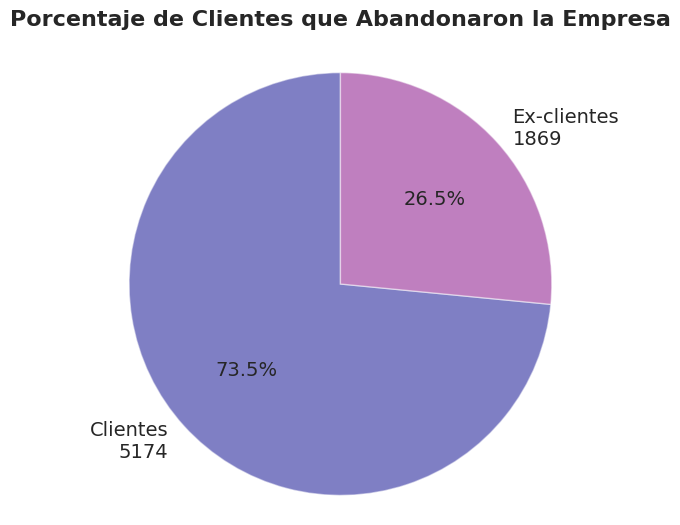

In [ ]:
etiquetas = ['Clientes', 'Ex-clientes']
valores = [n_clientes, n_ex_clientes]
colores = ['darkblue','purple']

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=[f'Clientes\n{n_clientes}',f'Ex-clientes\n{n_ex_clientes}'],
    colors=colores,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
    textprops={'fontsize': 14}
)
for wedge in wedges:
  wedge.set_alpha(0.5)
#plt.legend(etiquetas, bbox_to_anchor=(0.9, 0.2), fontsize=12)
ax.set_title('Porcentaje de Clientes que Abandonaron la Empresa', fontsize=16, fontweight='semibold', pad=20)
ax.axis('equal')
fig.savefig('/content/Clientes_abandonaron_empresa.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Boxplot mensual y anual Clientes y Ex-clientes

In [ ]:
datos.head()

,Churn,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DSL,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
0003-MKNFE,0,1,0,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
0004-TLHLJ,1,1,0,0,0,0,4,1,0,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
0011-IGKFF,1,1,0,1,1,0,13,1,0,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
0013-EXCHZ,1,0,1,1,1,0,3,1,0,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [ ]:
analisis_clientes = datos.query('Churn == 0')
analisis_ex_clientes = datos.query('Churn == 1')

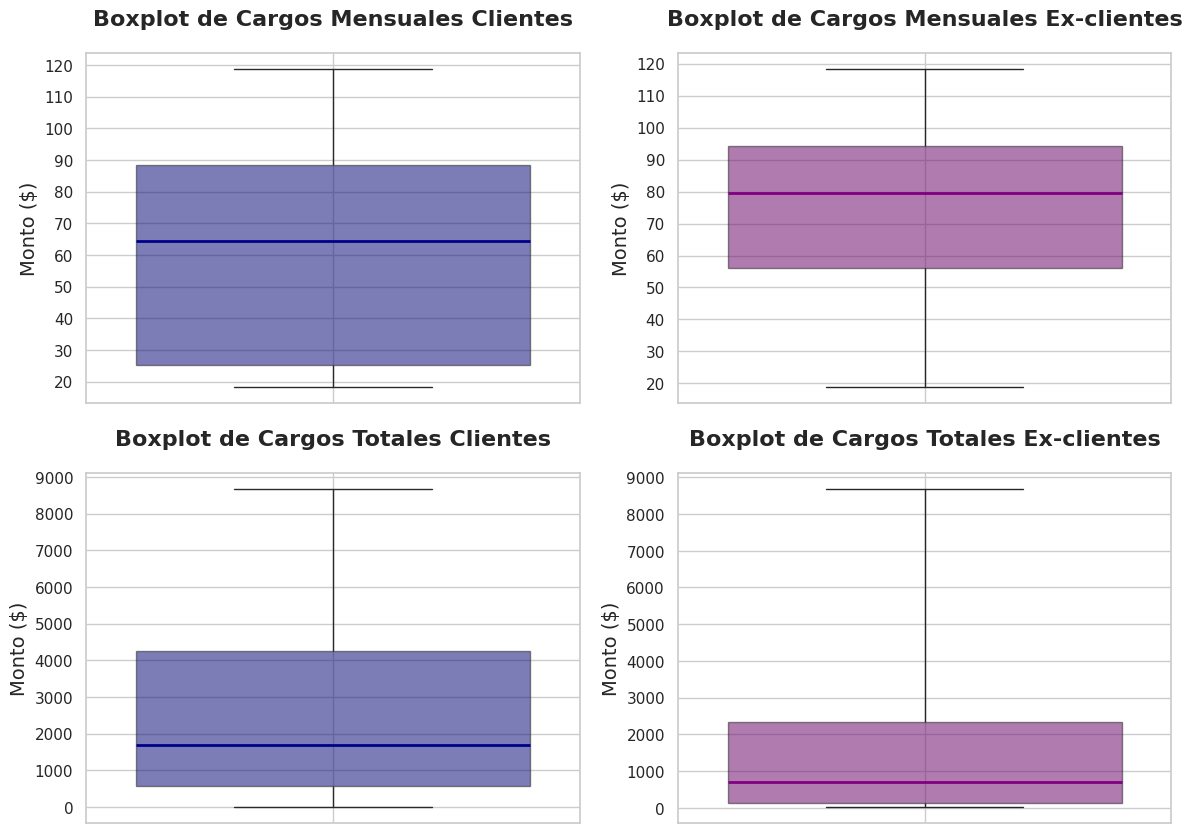

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(y=analisis_clientes['Charges.Monthly'], ax=axs[0,0], color='darkblue', medianprops={'color':'darkblue','linewidth':2.0},boxprops=dict(alpha=0.55))
axs[0,0].yaxis.set_major_locator(plt.MultipleLocator(10))
axs[0,0].set_title('Boxplot de Cargos Mensuales Clientes',pad=20,fontsize=16,fontweight='semibold')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Monto ($)',fontsize=14)
axs[0,0].grid(True)

sns.boxplot(y=analisis_ex_clientes['Charges.Monthly'], ax=axs[0,1], color='purple', medianprops={'color':'purple','linewidth':2.0},boxprops=dict(alpha=0.55))
axs[0,1].yaxis.set_major_locator(plt.MultipleLocator(10))
axs[0,1].set_title('Boxplot de Cargos Mensuales Ex-clientes',pad=20,fontsize=16,fontweight='semibold')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('Monto ($)',fontsize=14)
axs[0,1].grid(True)

sns.boxplot(y=analisis_clientes['Charges.Total'], ax=axs[1,0], color='darkblue', medianprops={'color':'darkblue','linewidth':2.0},boxprops=dict(alpha=0.55))
axs[1,0].yaxis.set_major_locator(plt.MultipleLocator(1000))
axs[1,0].set_title('Boxplot de Cargos Totales Clientes',pad=20,fontsize=16,fontweight='semibold')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Monto ($)',fontsize=14)
axs[1,0].grid(True)

sns.boxplot(y=analisis_ex_clientes['Charges.Total'], ax=axs[1,1], color='purple', medianprops={'color':'purple','linewidth':2.0},boxprops=dict(alpha=0.55),whis=8684.80)
axs[1,1].yaxis.set_major_locator(plt.MultipleLocator(1000))
axs[1,1].set_title('Boxplot de Cargos Totales Ex-clientes',pad=20,fontsize=16,fontweight='semibold')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('Monto ($)',fontsize=14)
axs[1,1].grid(True)

fig.savefig('/content/Boxplots.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
df_analisis = analisis_clientes['Charges.Monthly'].describe().to_frame().round(2)
df_analisis.rename(columns={'Charges.Monthly':'Clientes_Cargo_Mensual'},inplace=True)
df_analisis['Clientes_Cargo_Total'] = analisis_clientes['Charges.Total'].describe().round(2)
df_analisis['Ex-Clientes_Cargo_Mensual'] = analisis_ex_clientes['Charges.Monthly'].describe().round(2)
df_analisis['Ex-clientes_Cargo_Total'] = analisis_ex_clientes['Charges.Total'].describe().round(2)
df_analisis

,Clientes_Cargo_Mensual,Clientes_Cargo_Total,Ex-Clientes_Cargo_Mensual,Ex-clientes_Cargo_Total
count,5174.00,5174.00,1869.00,1869.00
mean,61.27,2549.91,74.44,1531.80
std,31.09,2329.95,24.67,1890.82
min,18.25,0.00,18.85,18.85
25%,25.10,572.90,56.15,134.50
50%,64.43,1679.52,79.65,703.55
75%,88.40,4262.85,94.20,2331.30
max,118.75,8672.45,118.35,8684.80


### Gráfico datos

In [ ]:
datos_ex_clientes = datos.loc[datos['Churn'] == 1,['Male','Female','SeniorCitizen','Partner','Dependents','PaperlessBilling']]

In [ ]:
datos_clientes = datos.loc[datos['Churn'] == 0,['Male','Female','SeniorCitizen','Partner','Dependents','PaperlessBilling']]

In [ ]:
sum_datos_ex = (datos_ex_clientes.sum()*100/len(datos_ex_clientes)).round(2)
sum_datos_cli = (datos_clientes.sum()*100/len(datos_clientes)).round(2)
sum_datos_ex = pd.DataFrame(sum_datos_ex)
sum_datos_cli = pd.DataFrame(sum_datos_cli)

In [ ]:
sum_datos_cli.rename(columns={0:'Porcentaje'},inplace=True)
sum_datos_ex.rename(columns={0:'Porcentaje'},inplace=True)

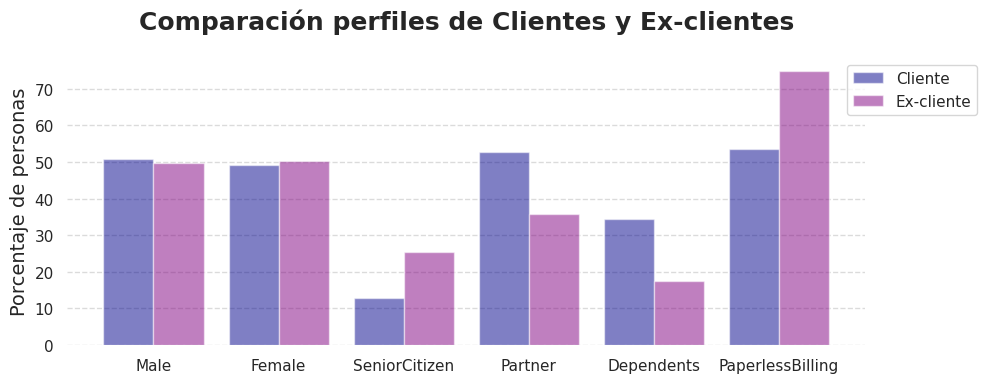

In [ ]:
x = np.arange(len(sum_datos_ex.index))  # posiciones en X
ancho = 0.4  # ancho de las barras

fig, ax = plt.subplots(figsize=(10, 4))

ax.set_frame_on(False)
barras1 = ax.bar(x - ancho/2, sum_datos_cli['Porcentaje'], width=ancho, label='Cliente', color='darkblue',alpha=0.5)
barras2 = ax.bar(x + ancho/2, sum_datos_ex['Porcentaje'], width=ancho, label='Ex-cliente', color='purple',alpha=0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xticks(x)
ax.set_xticklabels(sum_datos_cli.index)
ax.set_title('Comparación perfiles de Clientes y Ex-clientes',fontsize=18, fontweight='semibold',pad=20)
ax.set_ylabel('Porcentaje de personas',fontsize=14)
ax.set_xlabel('',fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
ax.grid(visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

fig.savefig('/content/Perfiles_clientes_exclientes.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Gráfico tenure

In [ ]:
tenure_ex_clientes = datos.loc[datos['Churn'] == 1,['tenure']]
tenure_clientes = datos.loc[datos['Churn'] == 0,['tenure']]

In [ ]:
df_tenure_cli = tenure_clientes['tenure'].groupby(tenure_clientes['tenure']).count().to_frame()
df_tenure_ex = tenure_ex_clientes['tenure'].groupby(tenure_ex_clientes['tenure']).count().to_frame()

In [ ]:
df_tenure_cli.rename(columns={'tenure':'tenure_agrupado'},inplace=True)
df_tenure_ex.rename(columns={'tenure':'tenure_agrupado'},inplace=True)

In [ ]:
nueva_fila = pd.DataFrame([{'tenure_agrupado': 0}])
df_tenure_ex = pd.concat([df_tenure_ex, nueva_fila])

In [ ]:
df_tenure_ex.sort_index(inplace=True)

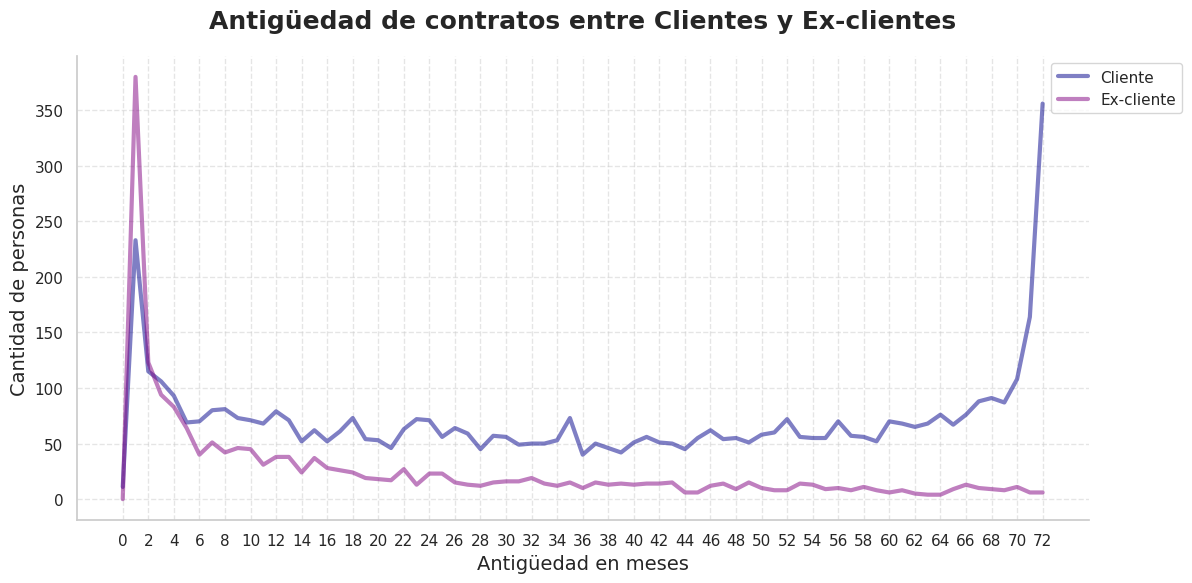

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_tenure_cli.index,df_tenure_cli['tenure_agrupado'],label='Cliente',color='darkblue',linewidth=3,alpha=0.5)

ax.plot(df_tenure_ex.index,df_tenure_ex['tenure_agrupado'],label='Ex-cliente',color='purple',linewidth=3,alpha=0.5)

ax.set_title('Antigüedad de contratos entre Clientes y Ex-clientes', fontsize=18, pad=20, fontweight='semibold')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_xlabel('Antigüedad en meses', fontsize=14)
ax.set_ylabel('Cantidad de personas', fontsize=14)
ax.set_xticks(range(0, max(df_tenure_cli.index)+1, 2))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
fig.savefig('/content/Tenure_clientes_exclientes.png',transparent=False,dpi=300,bbox_inches='tight')

plt.show()

### Gráfico tipo de contrato

In [ ]:
contract_ex_clientes = datos.loc[datos['Churn'] == 1,['Contract']]
contract_clientes = datos.loc[datos['Churn'] == 0,['Contract']]

In [ ]:
agrupado_cont_ex = contract_ex_clientes['Contract'].groupby(contract_ex_clientes['Contract']).count().to_frame()
agrupado_cont_cli = contract_clientes['Contract'].groupby(contract_clientes['Contract']).count().to_frame()

In [ ]:
agrupado_cont_ex.rename(columns={'Contract':'Total'},inplace=True)
agrupado_cont_cli.rename(columns={'Contract':'Total'},inplace=True)

In [ ]:
agrupado_cont_ex['Porcentaje'] = ((agrupado_cont_ex['Total'] / agrupado_cont_ex['Total'].sum()) * 100).round(2)
agrupado_cont_cli['Porcentaje'] = ((agrupado_cont_cli['Total'] / agrupado_cont_cli['Total'].sum()) * 100).round(2)

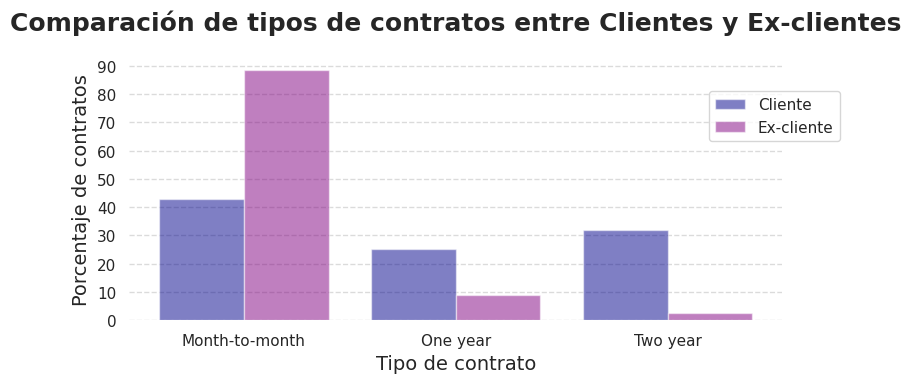

In [ ]:
x = np.arange(len(agrupado_cont_ex.index))  # posiciones en X
ancho = 0.4  # ancho de las barras

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_frame_on(False)
barras1 = ax.bar(x - ancho/2, agrupado_cont_cli['Porcentaje'], width=ancho, label='Cliente', color='darkblue',alpha=0.5)
barras2 = ax.bar(x + ancho/2, agrupado_cont_ex['Porcentaje'], width=ancho, label='Ex-cliente', color='purple',alpha=0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xticks(x)
ax.set_xticklabels(agrupado_cont_cli.index)
ax.set_title('Comparación de tipos de contratos entre Clientes y Ex-clientes',fontsize=18, fontweight='semibold',pad=20)
ax.set_ylabel('Porcentaje de contratos',fontsize=14)
ax.set_xlabel('Tipo de contrato',fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))
ax.grid(visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.savefig('/content/Contratos_clientes_exclientes.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Gráfico método de pago

In [ ]:
mpagos_ex_clientes = datos.loc[datos['Churn'] == 1,['PaymentMethod']]
mpagos_clientes = datos.loc[datos['Churn'] == 0,['PaymentMethod']]

In [ ]:
agrupado_mp_ex = mpagos_ex_clientes['PaymentMethod'].groupby(mpagos_ex_clientes['PaymentMethod']).count().to_frame()
agrupado_mp_cli = mpagos_clientes['PaymentMethod'].groupby(mpagos_clientes['PaymentMethod']).count().to_frame()

In [ ]:
agrupado_mp_ex.rename(columns={'PaymentMethod':'Total'},inplace=True)
agrupado_mp_cli.rename(columns={'PaymentMethod':'Total'},inplace=True)

In [ ]:
agrupado_mp_ex['Porcentaje'] = ((agrupado_mp_ex['Total'] / agrupado_mp_ex['Total'].sum()) * 100).round(2)
agrupado_mp_cli['Porcentaje'] = ((agrupado_mp_cli['Total'] / agrupado_mp_cli['Total'].sum()) * 100).round(2)

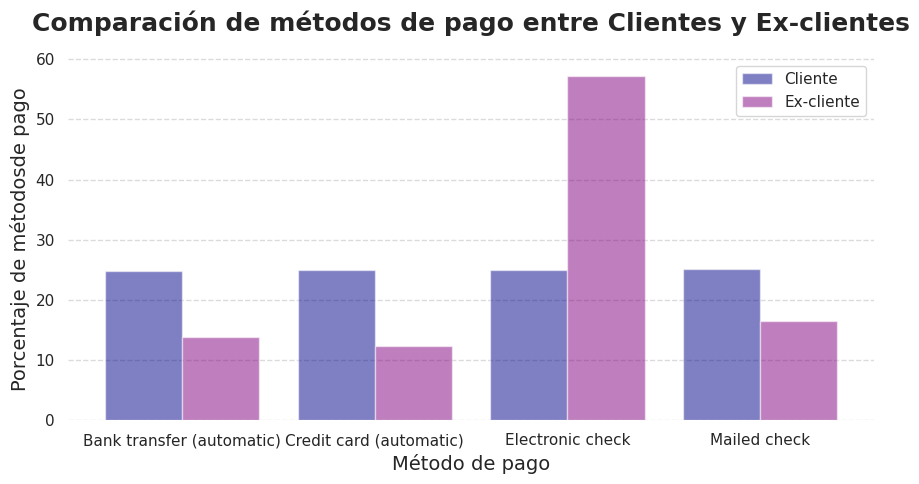

In [ ]:
x = np.arange(len(agrupado_mp_ex.index))  # posiciones en X
ancho = 0.4  # ancho de las barras

fig, ax = plt.subplots(figsize=(9, 5))

ax.set_frame_on(False)
barras1 = ax.bar(x - ancho/2, agrupado_mp_cli['Porcentaje'], width=ancho, label='Cliente', color='darkblue',alpha=0.5)
barras2 = ax.bar(x + ancho/2, agrupado_mp_ex['Porcentaje'], width=ancho, label='Ex-cliente', color='purple',alpha=0.5)

ax.set_xticks(x)
ax.set_xticklabels(agrupado_mp_cli.index)
ax.set_title('Comparación de métodos de pago entre Clientes y Ex-clientes',fontsize=18, fontweight='semibold',pad=20)
ax.set_ylabel('Porcentaje de métodosde pago',fontsize=14)
ax.set_xlabel('Método de pago',fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.grid(visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.savefig('/content/Metodos_de_pago.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Gráfico servicios contratados

In [ ]:
servicios_ex_clientes = datos.loc[datos['Churn'] == 1,['PhoneService','MultipleLines','DSL','Fibra_Optica','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

In [ ]:
servicios_clientes = datos.loc[datos['Churn'] == 0,['PhoneService','MultipleLines','DSL','Fibra_Optica','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

In [ ]:
sum_ser_ex = (servicios_ex_clientes.sum()*100/len(servicios_ex_clientes)).round(2)
sum_ser_cli = (servicios_clientes.sum()*100/len(servicios_clientes)).round(2)
sum_ser_ex = pd.DataFrame(sum_ser_ex)
sum_ser_cli = pd.DataFrame(sum_ser_cli)

In [ ]:
sum_ser_cli.rename(columns={0:'Total_servicios'},inplace=True)
sum_ser_ex.rename(columns={0:'Total_servicios'},inplace=True)

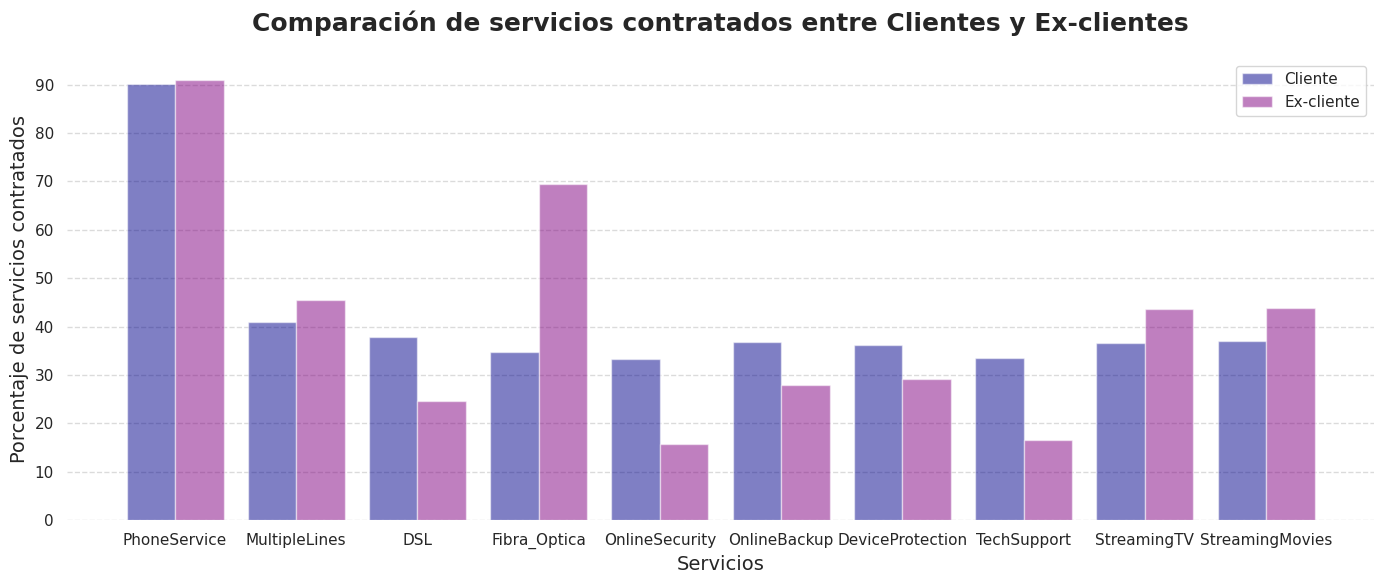

In [ ]:
x = np.arange(len(sum_ser_cli.index))  # posiciones en X
ancho = 0.4  # ancho de las barras

fig, ax = plt.subplots(figsize=(14, 6))

ax.set_frame_on(False)
barras1 = ax.bar(x - ancho/2, sum_ser_cli['Total_servicios'], width=ancho, label='Cliente', color='darkblue',alpha=0.5)
barras2 = ax.bar(x + ancho/2, sum_ser_ex['Total_servicios'], width=ancho, label='Ex-cliente', color='purple',alpha=0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xticks(x)
ax.set_xticklabels(sum_ser_cli.index)
ax.set_title('Comparación de servicios contratados entre Clientes y Ex-clientes',fontsize=18, fontweight='semibold',pad=20)
ax.set_ylabel('Porcentaje de servicios contratados',fontsize=14)
ax.set_xlabel('Servicios',fontsize=14)
ax.legend()
ax.grid(visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.savefig('/content/Servicios_contratados.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Correlación cuentas diarias

In [ ]:
ex_cuentas_diarias = datos.query('Churn == 1')['Cuentas_diarias'].to_frame()

In [ ]:
cli_cuentas_diarias = datos.query('Churn == 0')['Cuentas_diarias'].to_frame()

In [ ]:
bins = np.arange(0, cli_cuentas_diarias['Cuentas_diarias'].max() + 0.2, 0.2)

ex_cuentas_diarias['Cuentas_diarias_agrupadas'] = pd.cut(ex_cuentas_diarias['Cuentas_diarias'], bins=bins, right=False)

frecuencia_agrupada_ex = ex_cuentas_diarias['Cuentas_diarias_agrupadas'].value_counts().sort_index()

df_cuentas_diarias = frecuencia_agrupada_ex.to_frame()

In [ ]:
df_cuentas_diarias.rename(columns={'count':'Ex-clientes'},inplace=True)

In [ ]:
cli_cuentas_diarias['Cuentas_diarias_agrupadas'] = pd.cut(cli_cuentas_diarias['Cuentas_diarias'], bins=bins, right=False)

frecuencia_agrupada_cli = cli_cuentas_diarias['Cuentas_diarias_agrupadas'].value_counts().sort_index().to_frame()

df_cuentas_diarias['Clientes'] = frecuencia_agrupada_cli['count']


In [ ]:
df_cuentas_diarias.index = df_cuentas_diarias.index.astype(str)

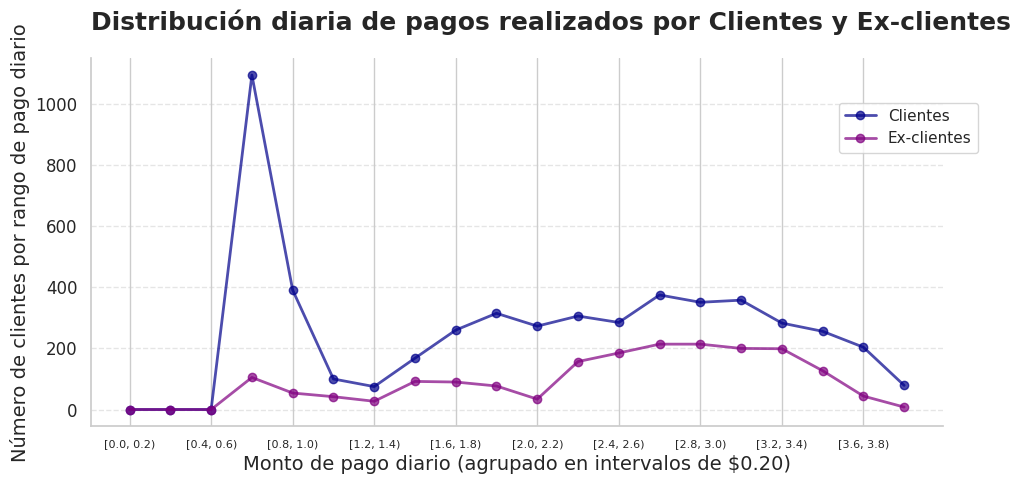

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_cuentas_diarias['Clientes'],lw=2,color='darkblue',marker='o',markerfacecolor='darkblue',alpha=0.7)
ax.plot(df_cuentas_diarias['Ex-clientes'],lw=2,color='purple',marker='o',alpha=0.7)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_title('Distribución diaria de pagos realizados por Clientes y Ex-clientes',fontsize=18,loc='left',pad=20,fontweight='semibold')
ax.set_xlabel('Monto de pago diario (agrupado en intervalos de $0.20)',fontsize=14)
ax.set_ylabel('Número de clientes por rango de pago diario',fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=8)
ax.legend(['Clientes','Ex-clientes'],bbox_to_anchor=(1.05, 0.9))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
fig.savefig('/content/Cuentas_diarias.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
correlacion = df_cuentas_diarias['Clientes'].corr(df_cuentas_diarias['Ex-clientes'])
print(f"Correlación Pearson: {correlacion:.2f}")

Correlación Pearson: 0.45


In [ ]:
correlacion_spearman = df_cuentas_diarias['Clientes'].corr(df_cuentas_diarias['Ex-clientes'], method='spearman')
print(f"Correlación de Spearman: {correlacion_spearman:.2f}")

Correlación de Spearman: 0.77


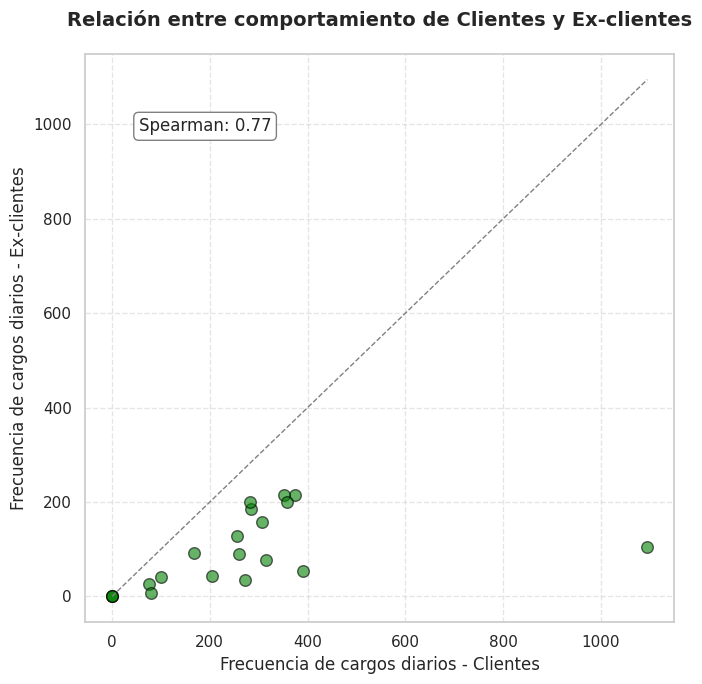

In [ ]:
correlacion_spearman = df_cuentas_diarias['Clientes'].corr(df_cuentas_diarias['Ex-clientes'], method='spearman')

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(df_cuentas_diarias['Clientes'], df_cuentas_diarias['Ex-clientes'], alpha=0.6, color='green', edgecolors='black', s=70)

max_val = max(df_cuentas_diarias[['Clientes', 'Ex-clientes']].max())
ax.plot([0, max_val], [0, max_val], color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Frecuencia de cargos diarios - Clientes', fontsize=12)
ax.set_ylabel('Frecuencia de cargos diarios - Ex-clientes', fontsize=12)
ax.set_title('Relación entre comportamiento de Clientes y Ex-clientes', fontsize=14,pad=20,fontweight='semibold')

ax.grid(True, linestyle='--', alpha=0.5)

ax.text(0.05 * max_val, 0.9 * max_val, f'Spearman: {correlacion_spearman:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

fig.tight_layout()
fig.savefig('/content/Correlacion_cuentas_diarias.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()


### Correlacion servicios contratados y Churn

In [ ]:
analisis_ex_clientes

,Churn,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DSL,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0004-TLHLJ,1,1,0,0,0,0,4,1,0,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
0011-IGKFF,1,1,0,1,1,0,13,1,0,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
0013-EXCHZ,1,0,1,1,1,0,3,1,0,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
0022-TCJCI,1,1,0,1,0,0,45,1,0,1,...,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.09
0023-HGHWL,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961-JBNMK,1,1,0,1,0,0,21,1,0,0,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.23
9965-YOKZB,1,1,0,1,0,0,9,1,1,0,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.80
9985-MWVIX,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.34


In [ ]:
columnas_seleccionadas = datos.columns[7:17]
filas_y_columnas_seleccionadas = datos.loc[:, columnas_seleccionadas]

In [ ]:
datos['Numero_servicios'] = filas_y_columnas_seleccionadas.sum(axis=1)

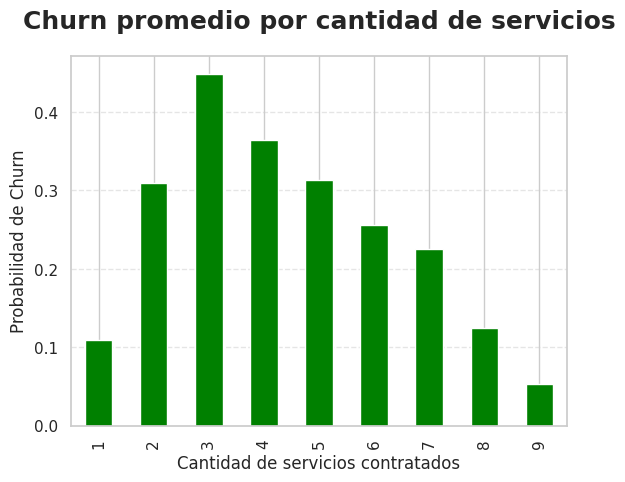

In [ ]:
churn_by_services = datos.groupby('Numero_servicios')['Churn'].mean()

fig, ax = plt.subplots()

churn_by_services.plot(kind='bar', color='green', ax=ax)

ax.set_ylabel('Probabilidad de Churn')
ax.set_xlabel('Cantidad de servicios contratados')
ax.set_title('Churn promedio por cantidad de servicios',fontsize=18,pad=20,fontweight='semibold')

ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.savefig('/content/Churn_promedio_por_servicios.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
corr_pearson = datos['Numero_servicios'].corr(datos['Churn'], method='pearson')
corr_spearman = datos['Numero_servicios'].corr(datos['Churn'], method='spearman')

print(f"Pearson: {corr_pearson:.2f}, Spearman: {corr_spearman:.2f}")

Pearson: -0.02, Spearman: -0.00


#📄Informe final

In [ ]:
from IPython.display import Image, display, IFrame, HTML

---
---
## Introducción

En el mercado de las telecomunicaciones, la retención de clientes representa un desafío estratégico crucial para la sostenibilidad y crecimiento de las empresas. El fenómeno del abandono de clientes (churn, la decisión de un cliente de dejar de contratar los servicios ofrecidos por la compañía) puede generar pérdidas significativas, tanto en ingresos recurrentes como en costos asociados a la captación de nuevos usuarios.

Este proyecto tiene como objetivo realizar un análisis exploratorio exhaustivo del comportamiento de clientes y ex-clientes de una empresa de telecomunicaciones, con el fin de identificar los factores que influyen en la decisión de abandono. A través del uso de técnicas estadísticas, visualizaciones avanzadas y comparación de variables clave (como cargos mensuales, tipo de contrato, método de pago, servicios contratados y comportamiento de consumo diario), se busca establecer patrones que diferencien a los clientes que permanecen de aquellos que se desvinculan.

Los resultados obtenidos permitirán no solo comprender mejor las dinámicas de churn, sino también orientar decisiones estratégicas para el diseño de políticas de fidelización, personalización de servicios y optimización de campañas de retención.

---
---
##**Extracción y tratamiento de datos**

El objetivo de esta etapa fue cargar, transformar y preparar los datos de clientes de la empresa de telecomunicaciones TelecomX, originalmente almacenados en formato JSON, con el fin de dejarlos en una estructura tabular adecuada para el análisis exploratorio y el modelado predictivo.

Para ello, se transformaron las estructuras anidadas del archivo JSON en tablas planas mediante el uso de json_normalize, y posteriormente se combinaron las diferentes secciones de datos (como customer, phone, internet y account) con los datos no anidados mediante pd.concat a lo largo de las columnas (axis=1). El resultado fue un DataFrame completamente plano y consolidado, listo para ser utilizado en análisis exploratorios, ingeniería de características y la eventual construcción de modelos predictivos, como por ejemplo, modelos de churn o abandono de clientes.

Posteriormente, se realizó un proceso de limpieza y transformación de datos para asegurar la calidad y consistencia del conjunto. Se eliminaron las filas donde la columna Churn estaba vacía (""), ya que estos registros no permiten determinar si el cliente abandonó el servicio o no, y por lo tanto no aportan valor al análisis del abandono.

En cuanto a las variables categóricas, se crearon nuevas columnas binarias Male y Female a partir de la columna gender, lo que facilita su uso en modelos estadísticos o de machine learning. De manera similar, se generaron variables binarias que indican si el cliente usa conexión DSL o fibra óptica; en este caso, las otras opciones, como "No internet service", quedan implícitas cuando ambas columnas son cero.

Se normalizaron valores como "No phone service" y "No internet service" a "No", y luego se transformaron todos los valores "Yes" y "No" a 1 y 0, respectivamente. Esta conversión es clave para facilitar el análisis numérico y el entrenamiento de modelos supervisados.

También se corrigió la columna Charges.Total, reemplazando los espacios en blanco por "0" —lo que probablemente indica que el cliente aún no ha sido facturado— y convirtiendo la columna a tipo numérico (float64).

Además, se estableció la columna customerID como índice del DataFrame, ya que representa un identificador único para cada cliente, lo que facilita la gestión de los datos a nivel individual.

Finalmente, se creó una nueva variable derivada denominada Cuentas_diarias, que representa el gasto diario estimado por cliente. Esta se calculó dividiendo el cargo mensual (MonthlyCharges) entre 30 días, y se redondeó a dos decimales para una mejor interpretación.

In [ ]:
datos.head()

,Churn,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DSL,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias,Numero_servicios
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,0,1,1,9,1,0,1,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,5
0003-MKNFE,0,1,0,0,0,0,9,1,1,1,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,4
0004-TLHLJ,1,1,0,0,0,0,4,1,0,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,3
0011-IGKFF,1,1,0,1,1,0,13,1,0,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,6
0013-EXCHZ,1,0,1,1,1,0,3,1,0,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,4


---
---
## **Análisis**

###**Distribución de Clientes vs. Ex-clientes**

Un gráfico de torta evidenció que aproximadamente un 27% de los usuarios han abandonado la empresa, mientras que el 73% continúa siendo cliente. Esta proporción indica un nivel de abandono moderado que requiere atención para evitar su aumento.

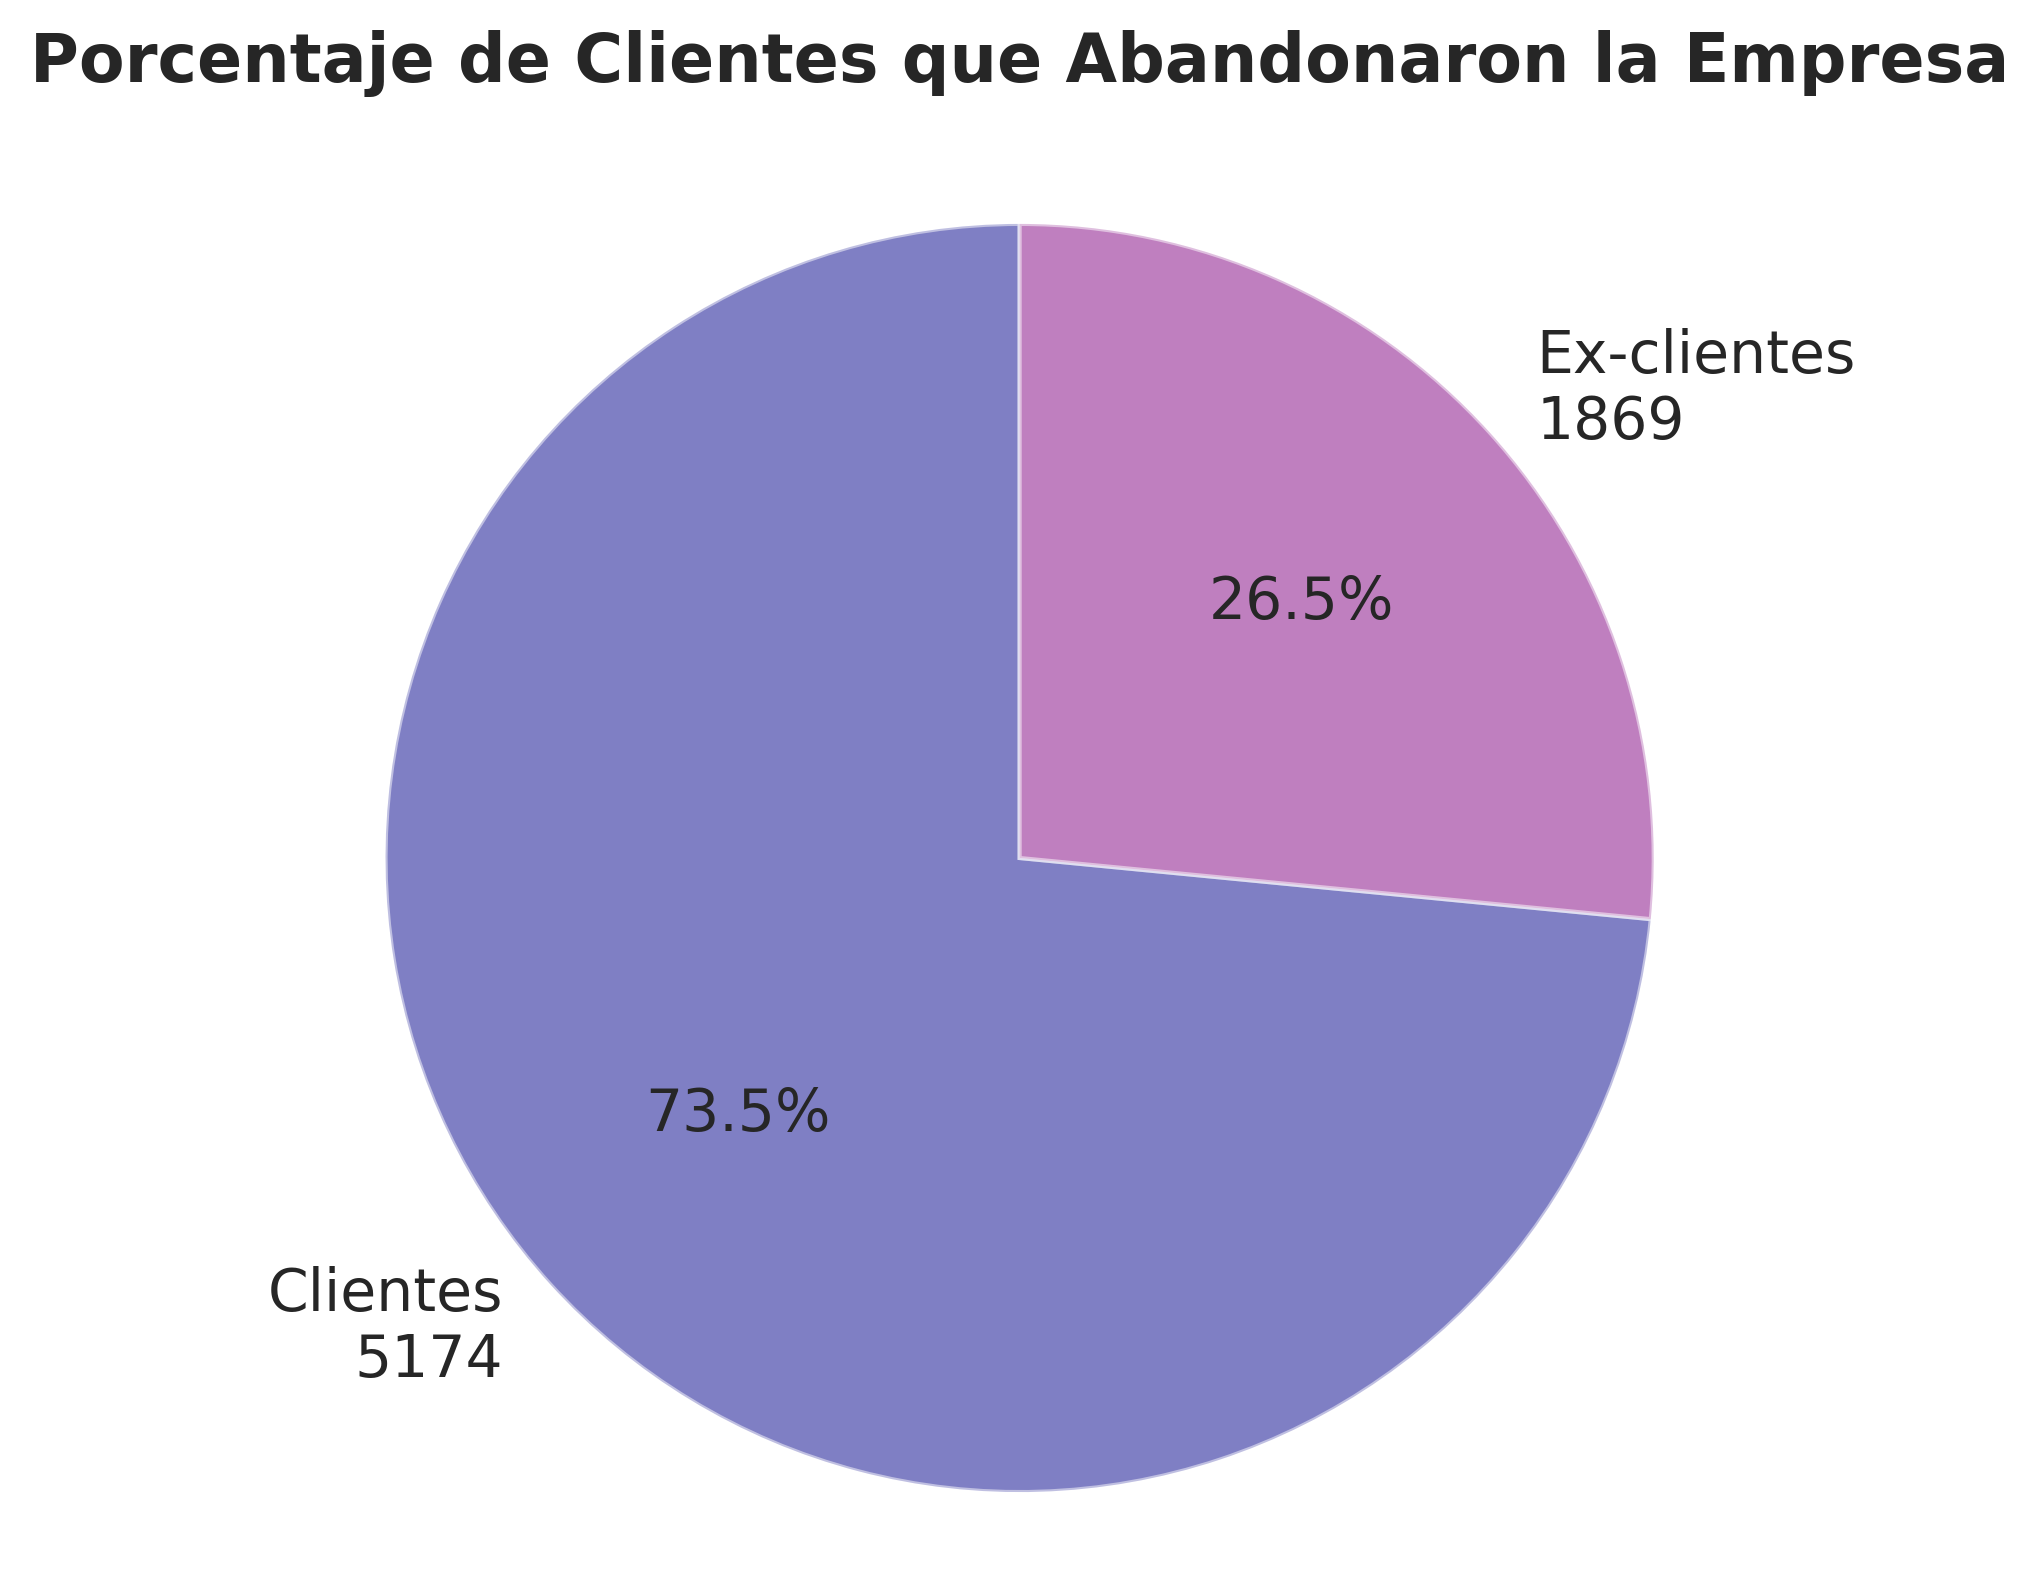

In [ ]:
display(Image('/content/Clientes_abandonaron_empresa.png', width=550, height=400))

###**Análisis de Cargos Mensuales y Totales**

Se realizaron boxplots diferenciando clientes y ex-clientes:

Cargos Mensuales: Los ex-clientes presentan una mediana de cargo mensual ligeramente superior a la de los clientes actuales. Esto sugiere que los clientes que pagan más podrían estar más propensos a abandonar.

Cargos Totales: Los clientes actuales tienen un rango más amplio de cargos totales, lo que refleja mayor antigüedad. En cambio, los ex-clientes tienden a concentrarse en niveles más bajos de gasto total.



,Clientes_Cargo_Mensual,Clientes_Cargo_Total,Ex-Clientes_Cargo_Mensual,Ex-clientes_Cargo_Total
count,5174.00,5174.00,1869.00,1869.00
mean,61.27,2549.91,74.44,1531.80
std,31.09,2329.95,24.67,1890.82
min,18.25,0.00,18.85,18.85
25%,25.10,572.90,56.15,134.50
50%,64.43,1679.52,79.65,703.55
75%,88.40,4262.85,94.20,2331.30
max,118.75,8672.45,118.35,8684.80


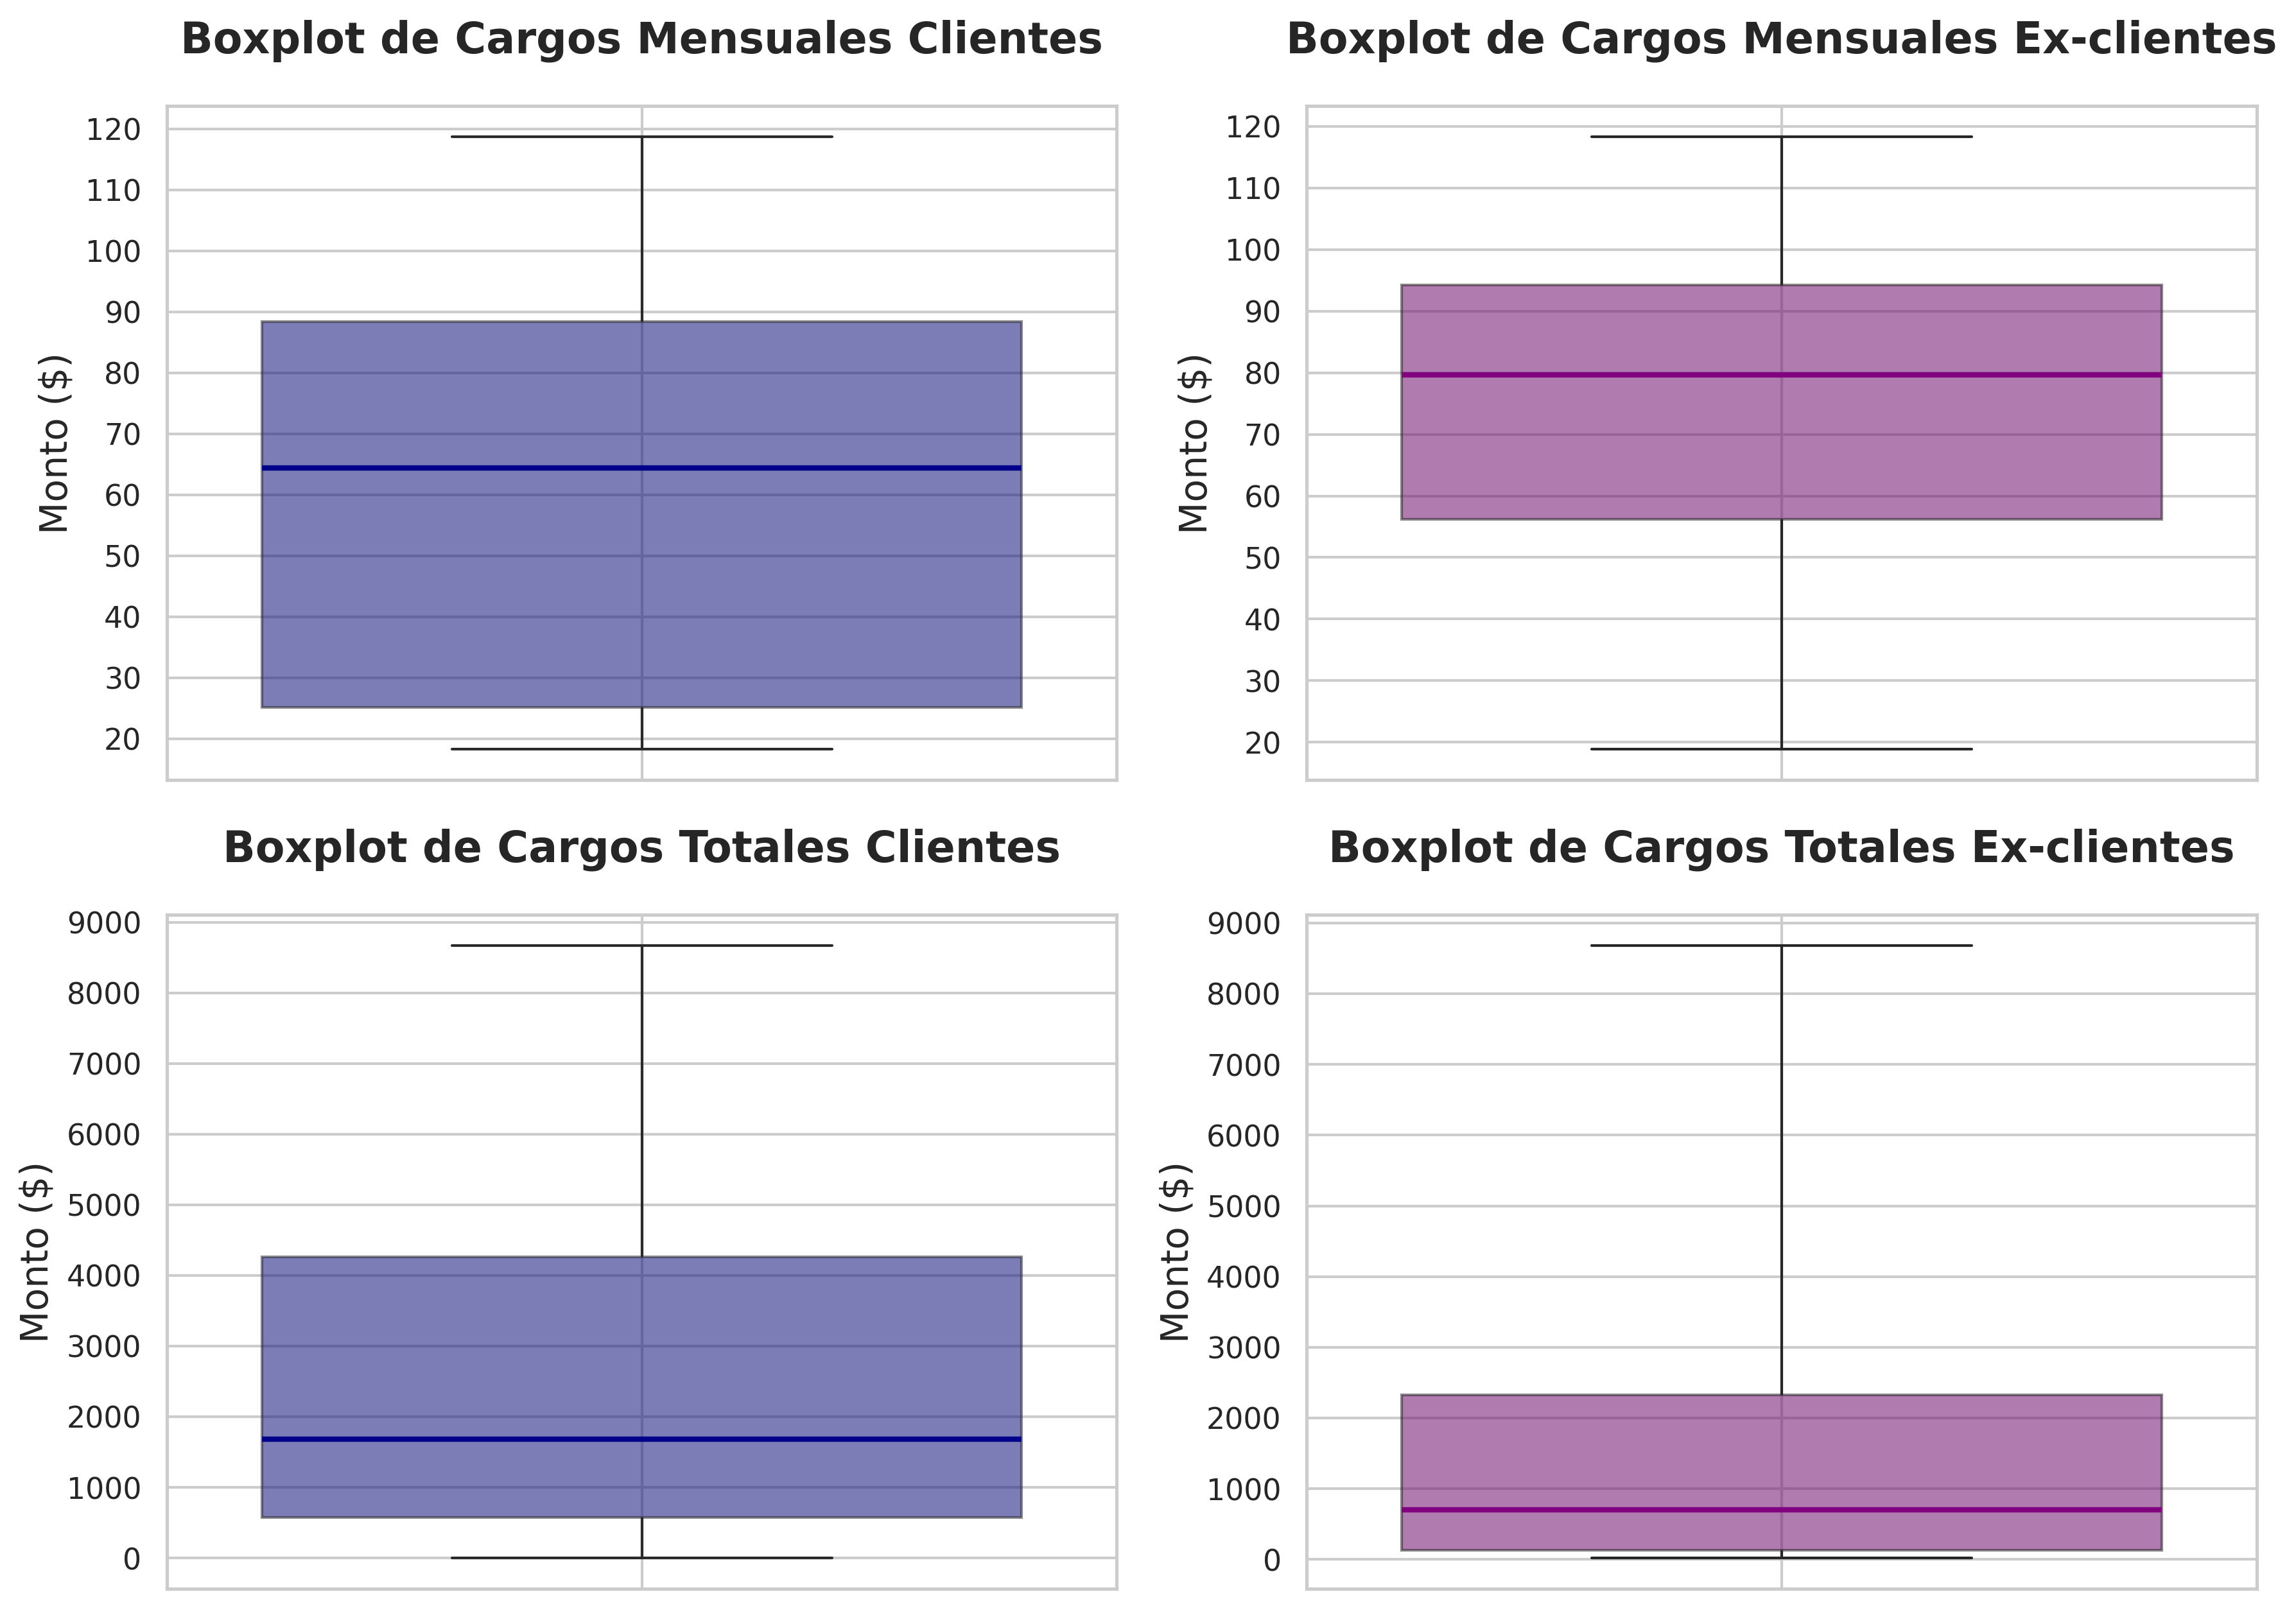

In [ ]:
display(df_analisis)
display(Image('/content/Boxplots.png', width=900, height=700))

###**Características Demográficas y de Facturación**

La comparación de atributos como sexo, vejez, presencia de pareja o hijos, y facturación en papel revela:

Mayor proporción de ex-clientes entre usuarios sin dependientes ni pareja.

Los clientes actuales tienen una mayor preferencia por facturación tradicional en comparación con los ex-clientes.



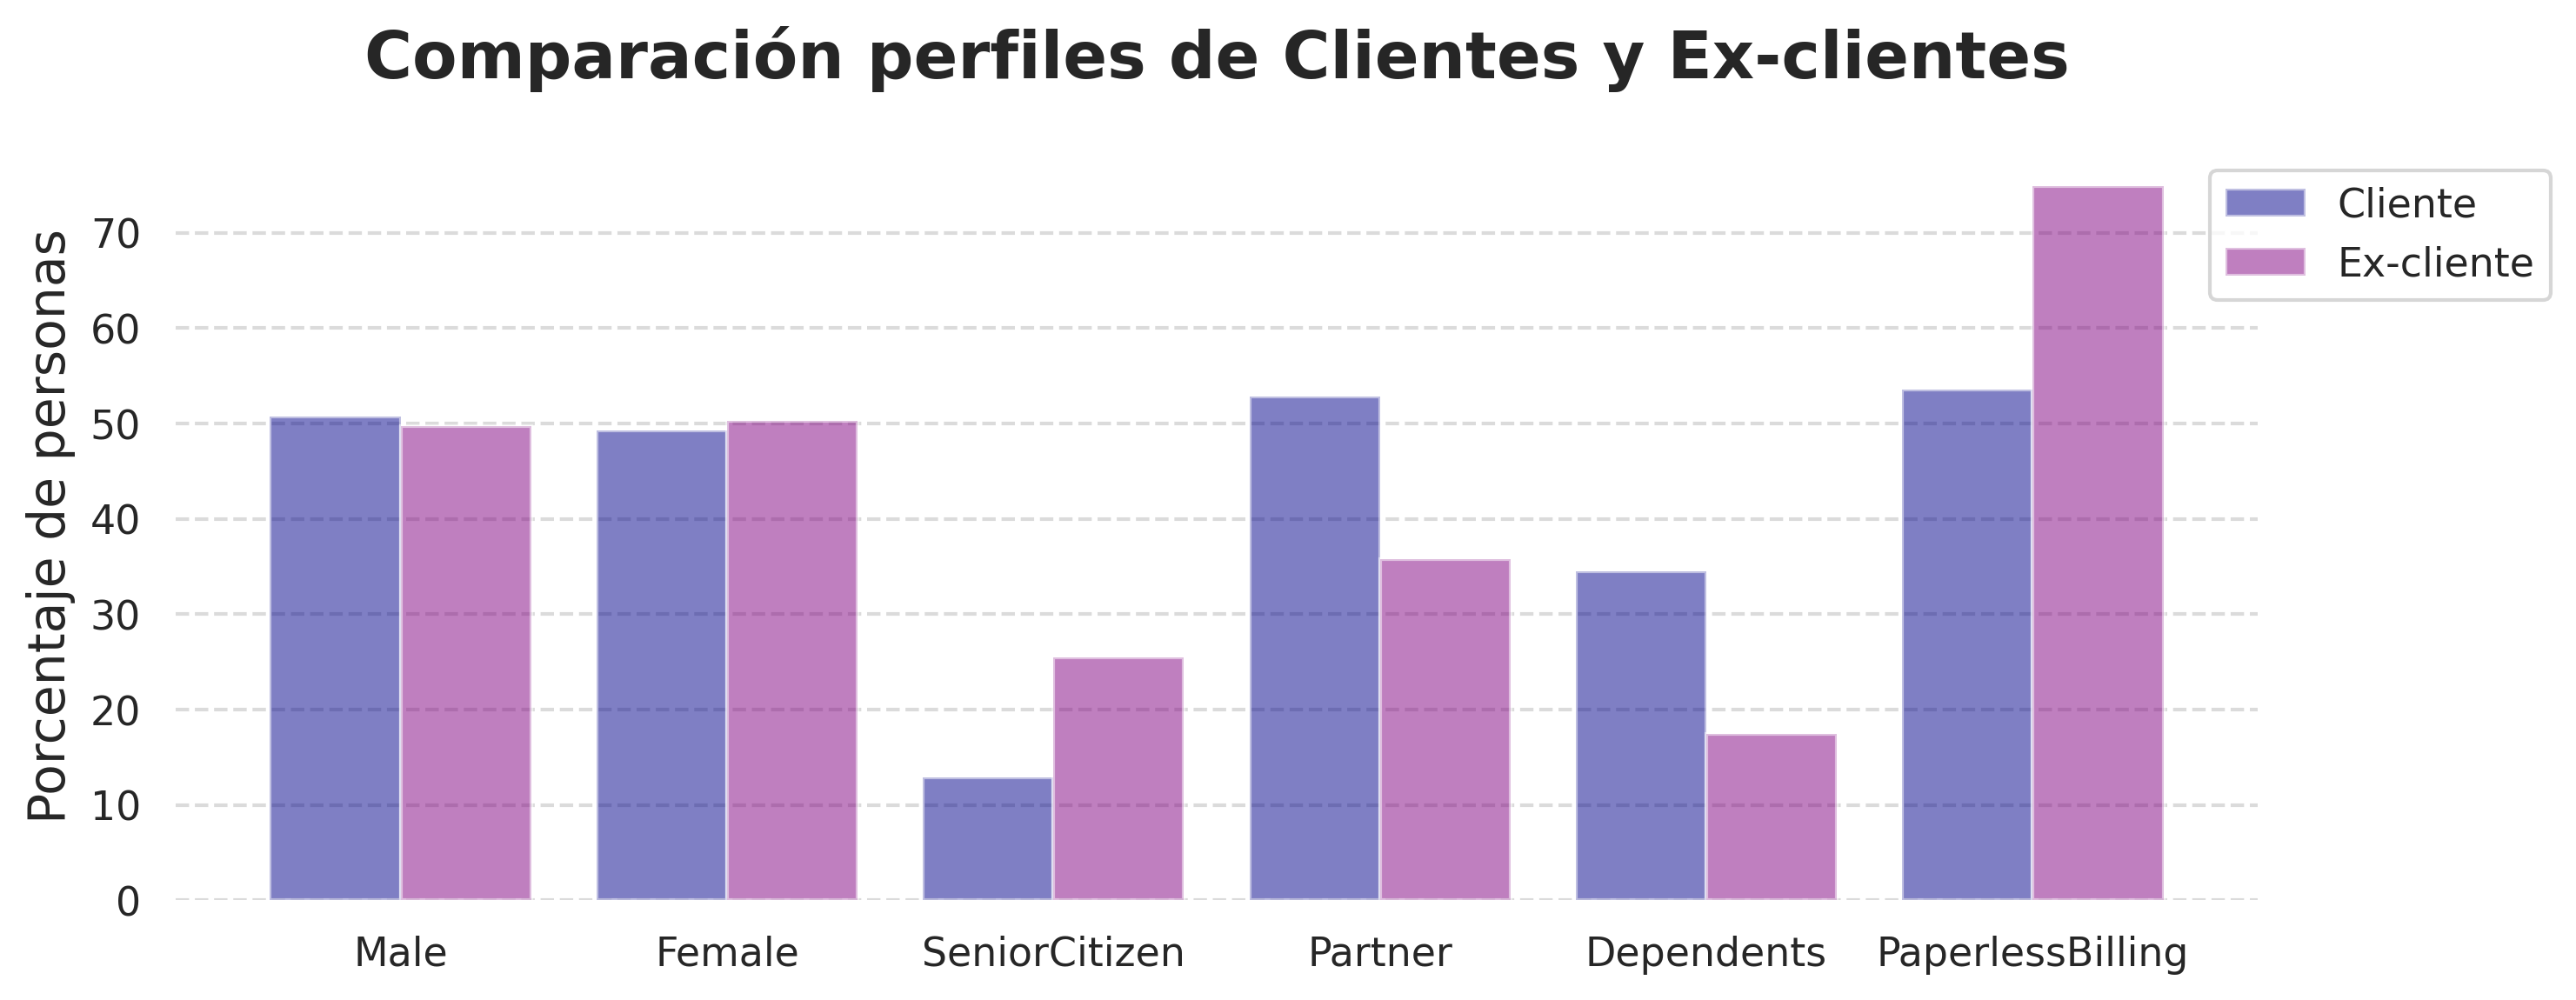

In [ ]:
display(Image('/content/Perfiles_clientes_exclientes.png', width=750, height=350))

###**Antigüedad del Contrato (Tenure)**

Se observa una concentración de ex-clientes con menos de 10 meses de permanencia. En contraste, los clientes actuales presentan una distribución más estable a lo largo del tiempo, con muchos usuarios de larga data. Esto confirma que la mayor vulnerabilidad al churn ocurre en los primeros meses del servicio.


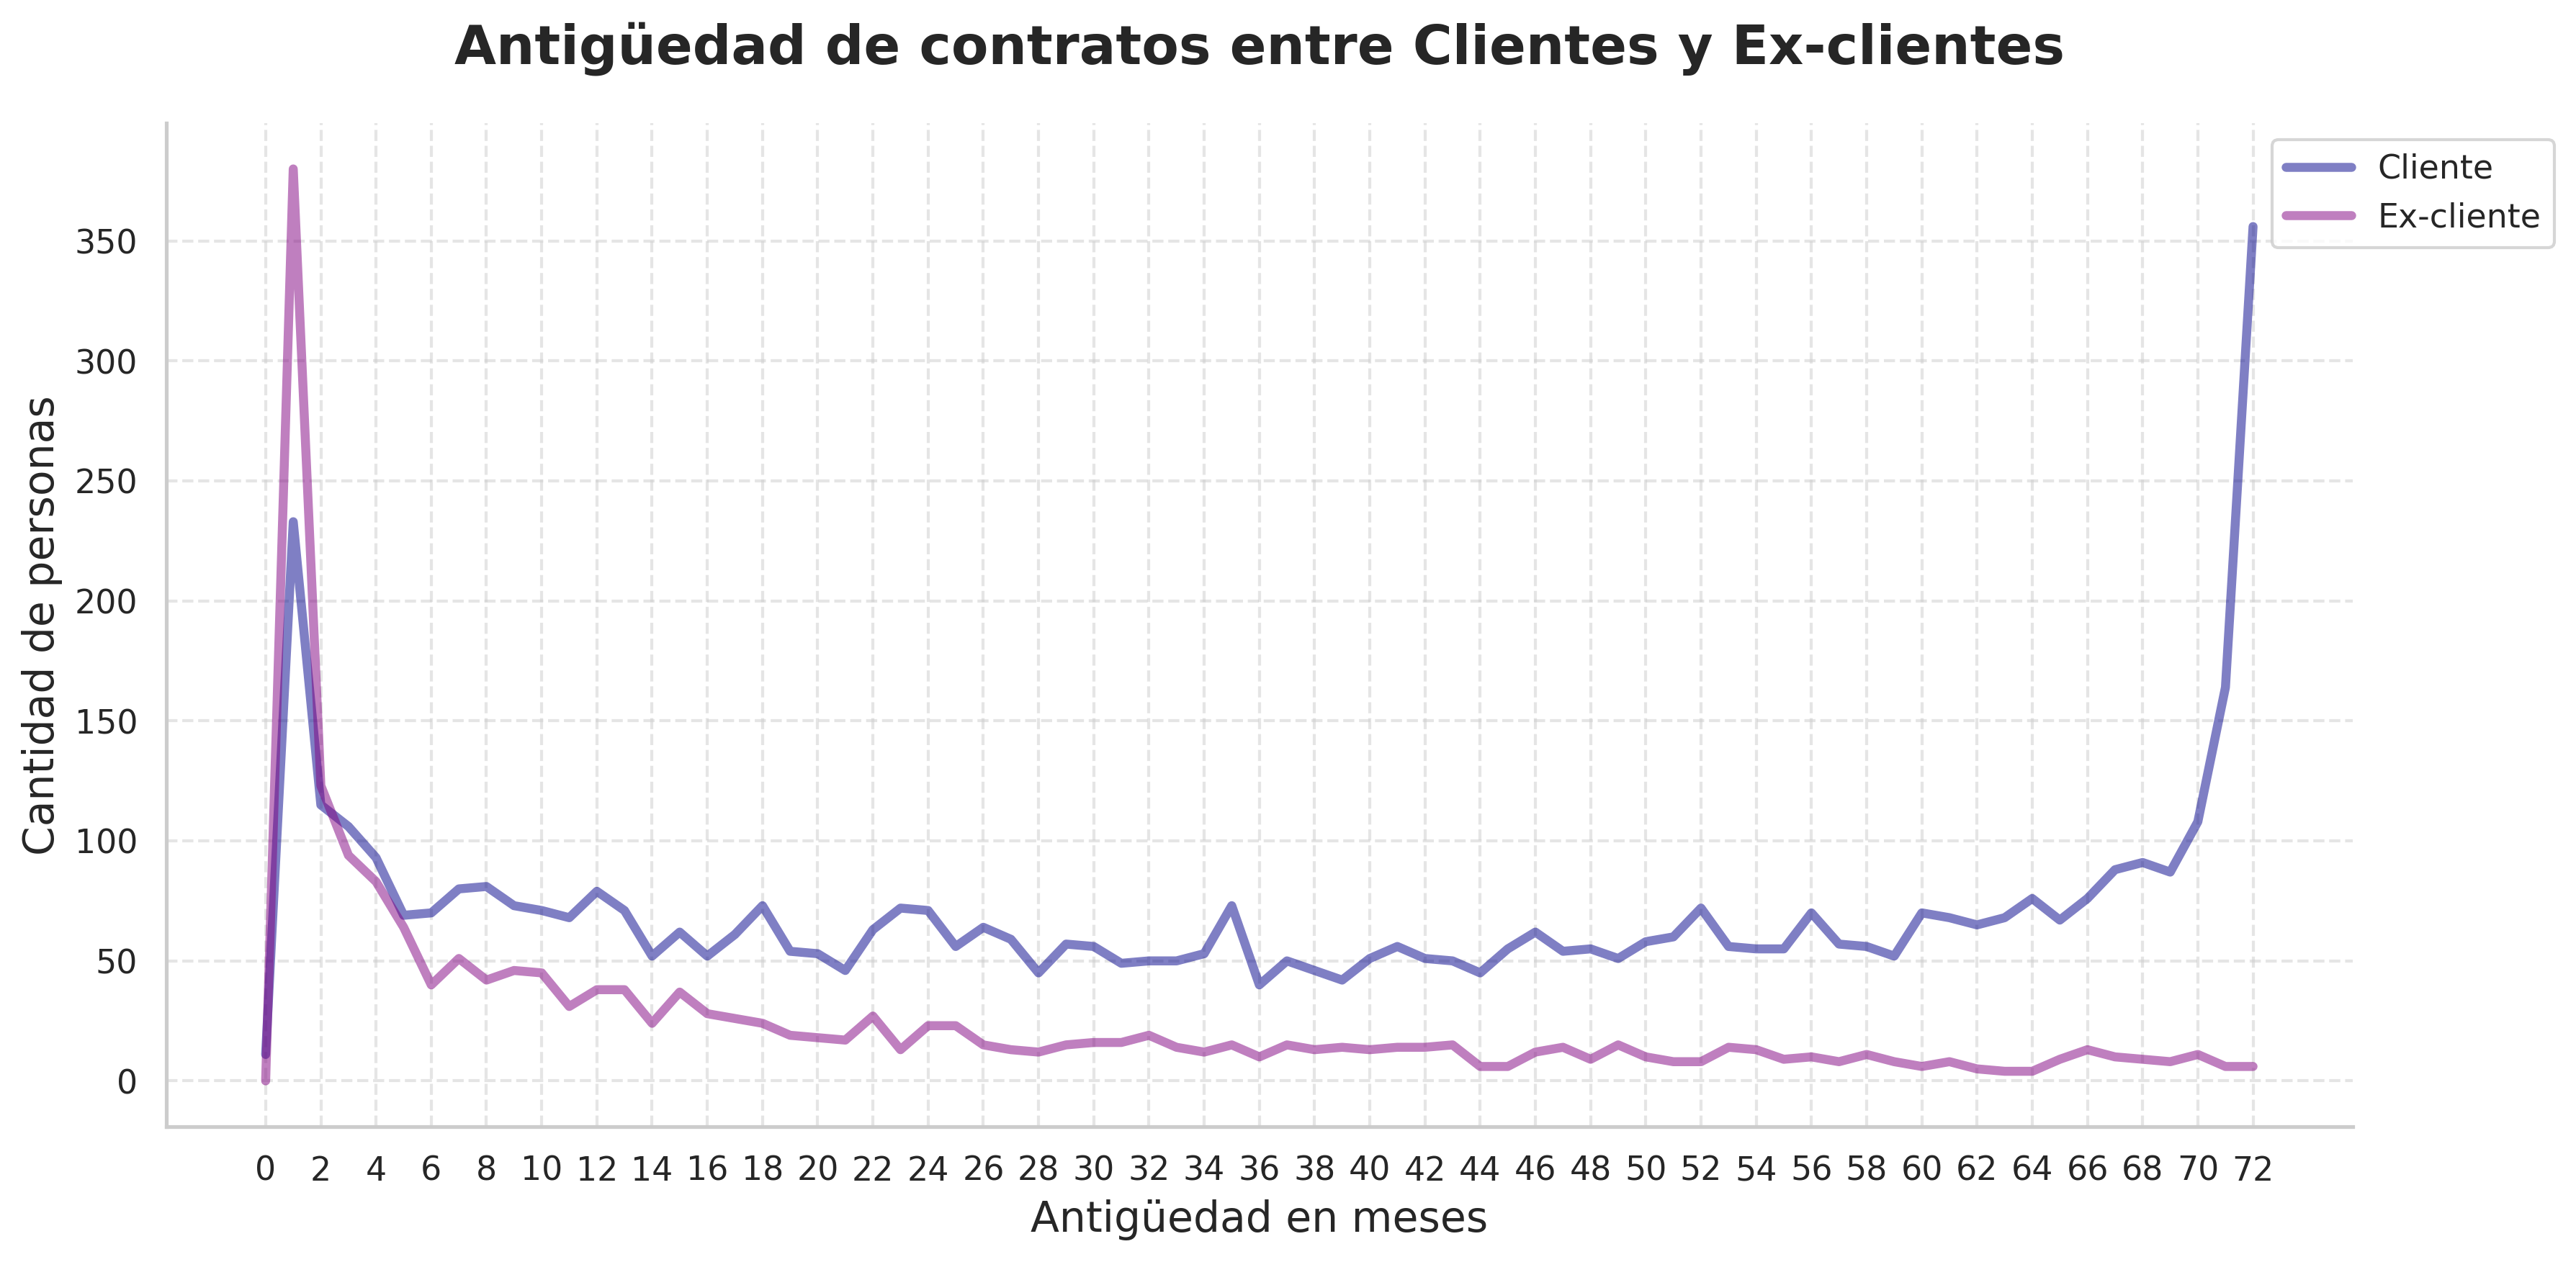

In [ ]:
display(Image('/content/Tenure_clientes_exclientes.png', width=950, height=450))

###**Tipo de Contrato**

Contrato mensual es el más común entre ex-clientes (mayor flexibilidad y menor compromiso).

Contratos anuales o a dos años tienen mejor retención, lo que sugiere que fomentar estos tipos de contrato podría reducir el churn.


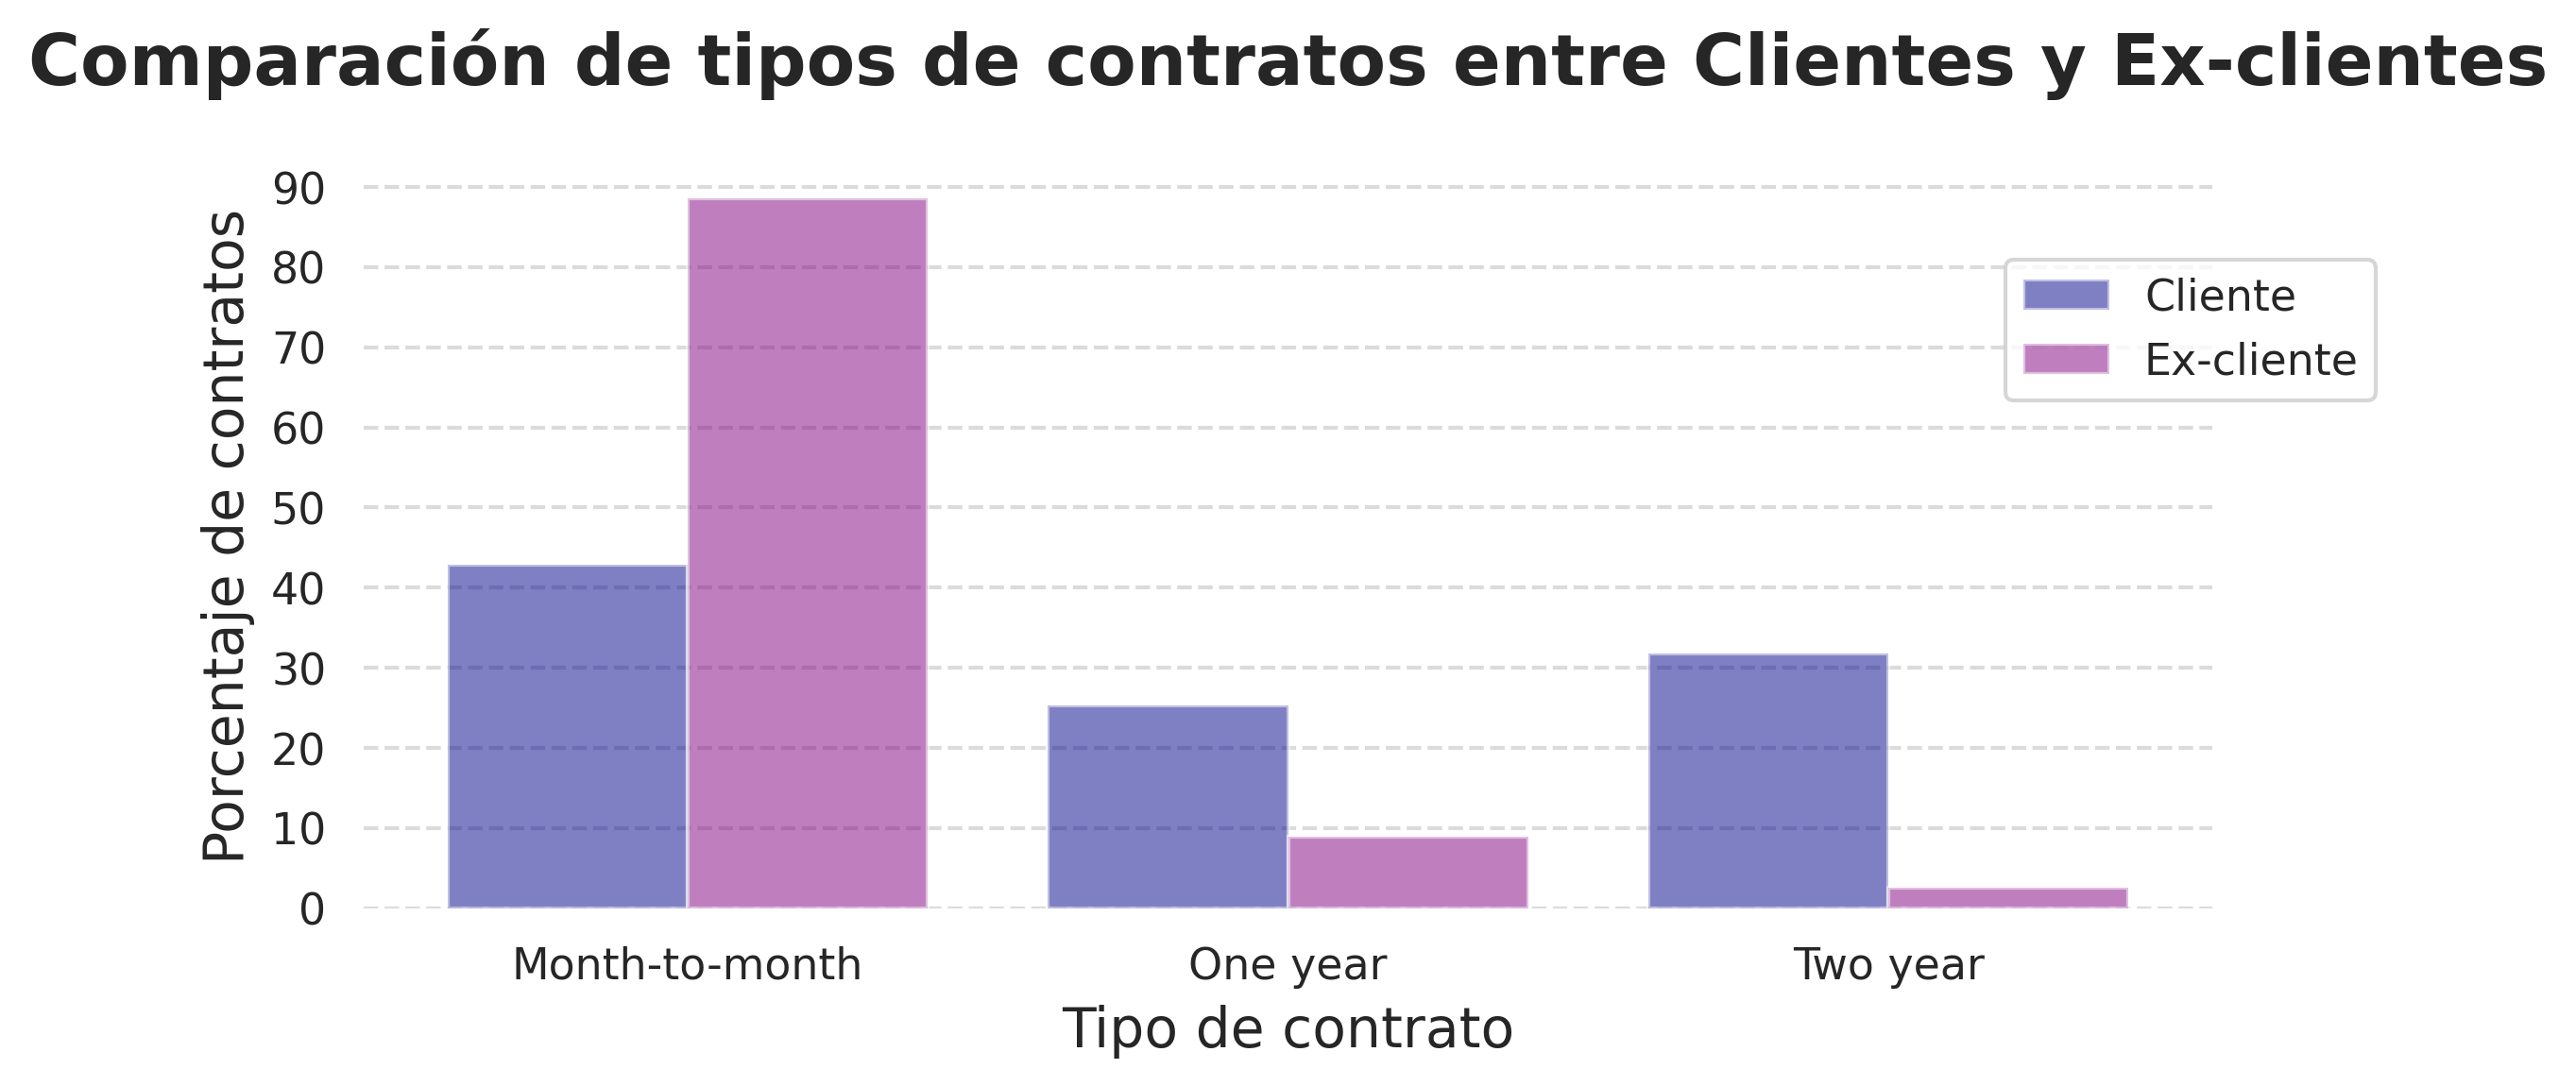

In [ ]:
display(Image('/content/Contratos_clientes_exclientes.png', width=750, height=350))

###**Métodos de Pago**

El pago electrónico automático está más asociado a clientes actuales.

Ex-clientes usan con más frecuencia el método de pago de eCheck, posiblemente asociados a experiencias menos eficientes.


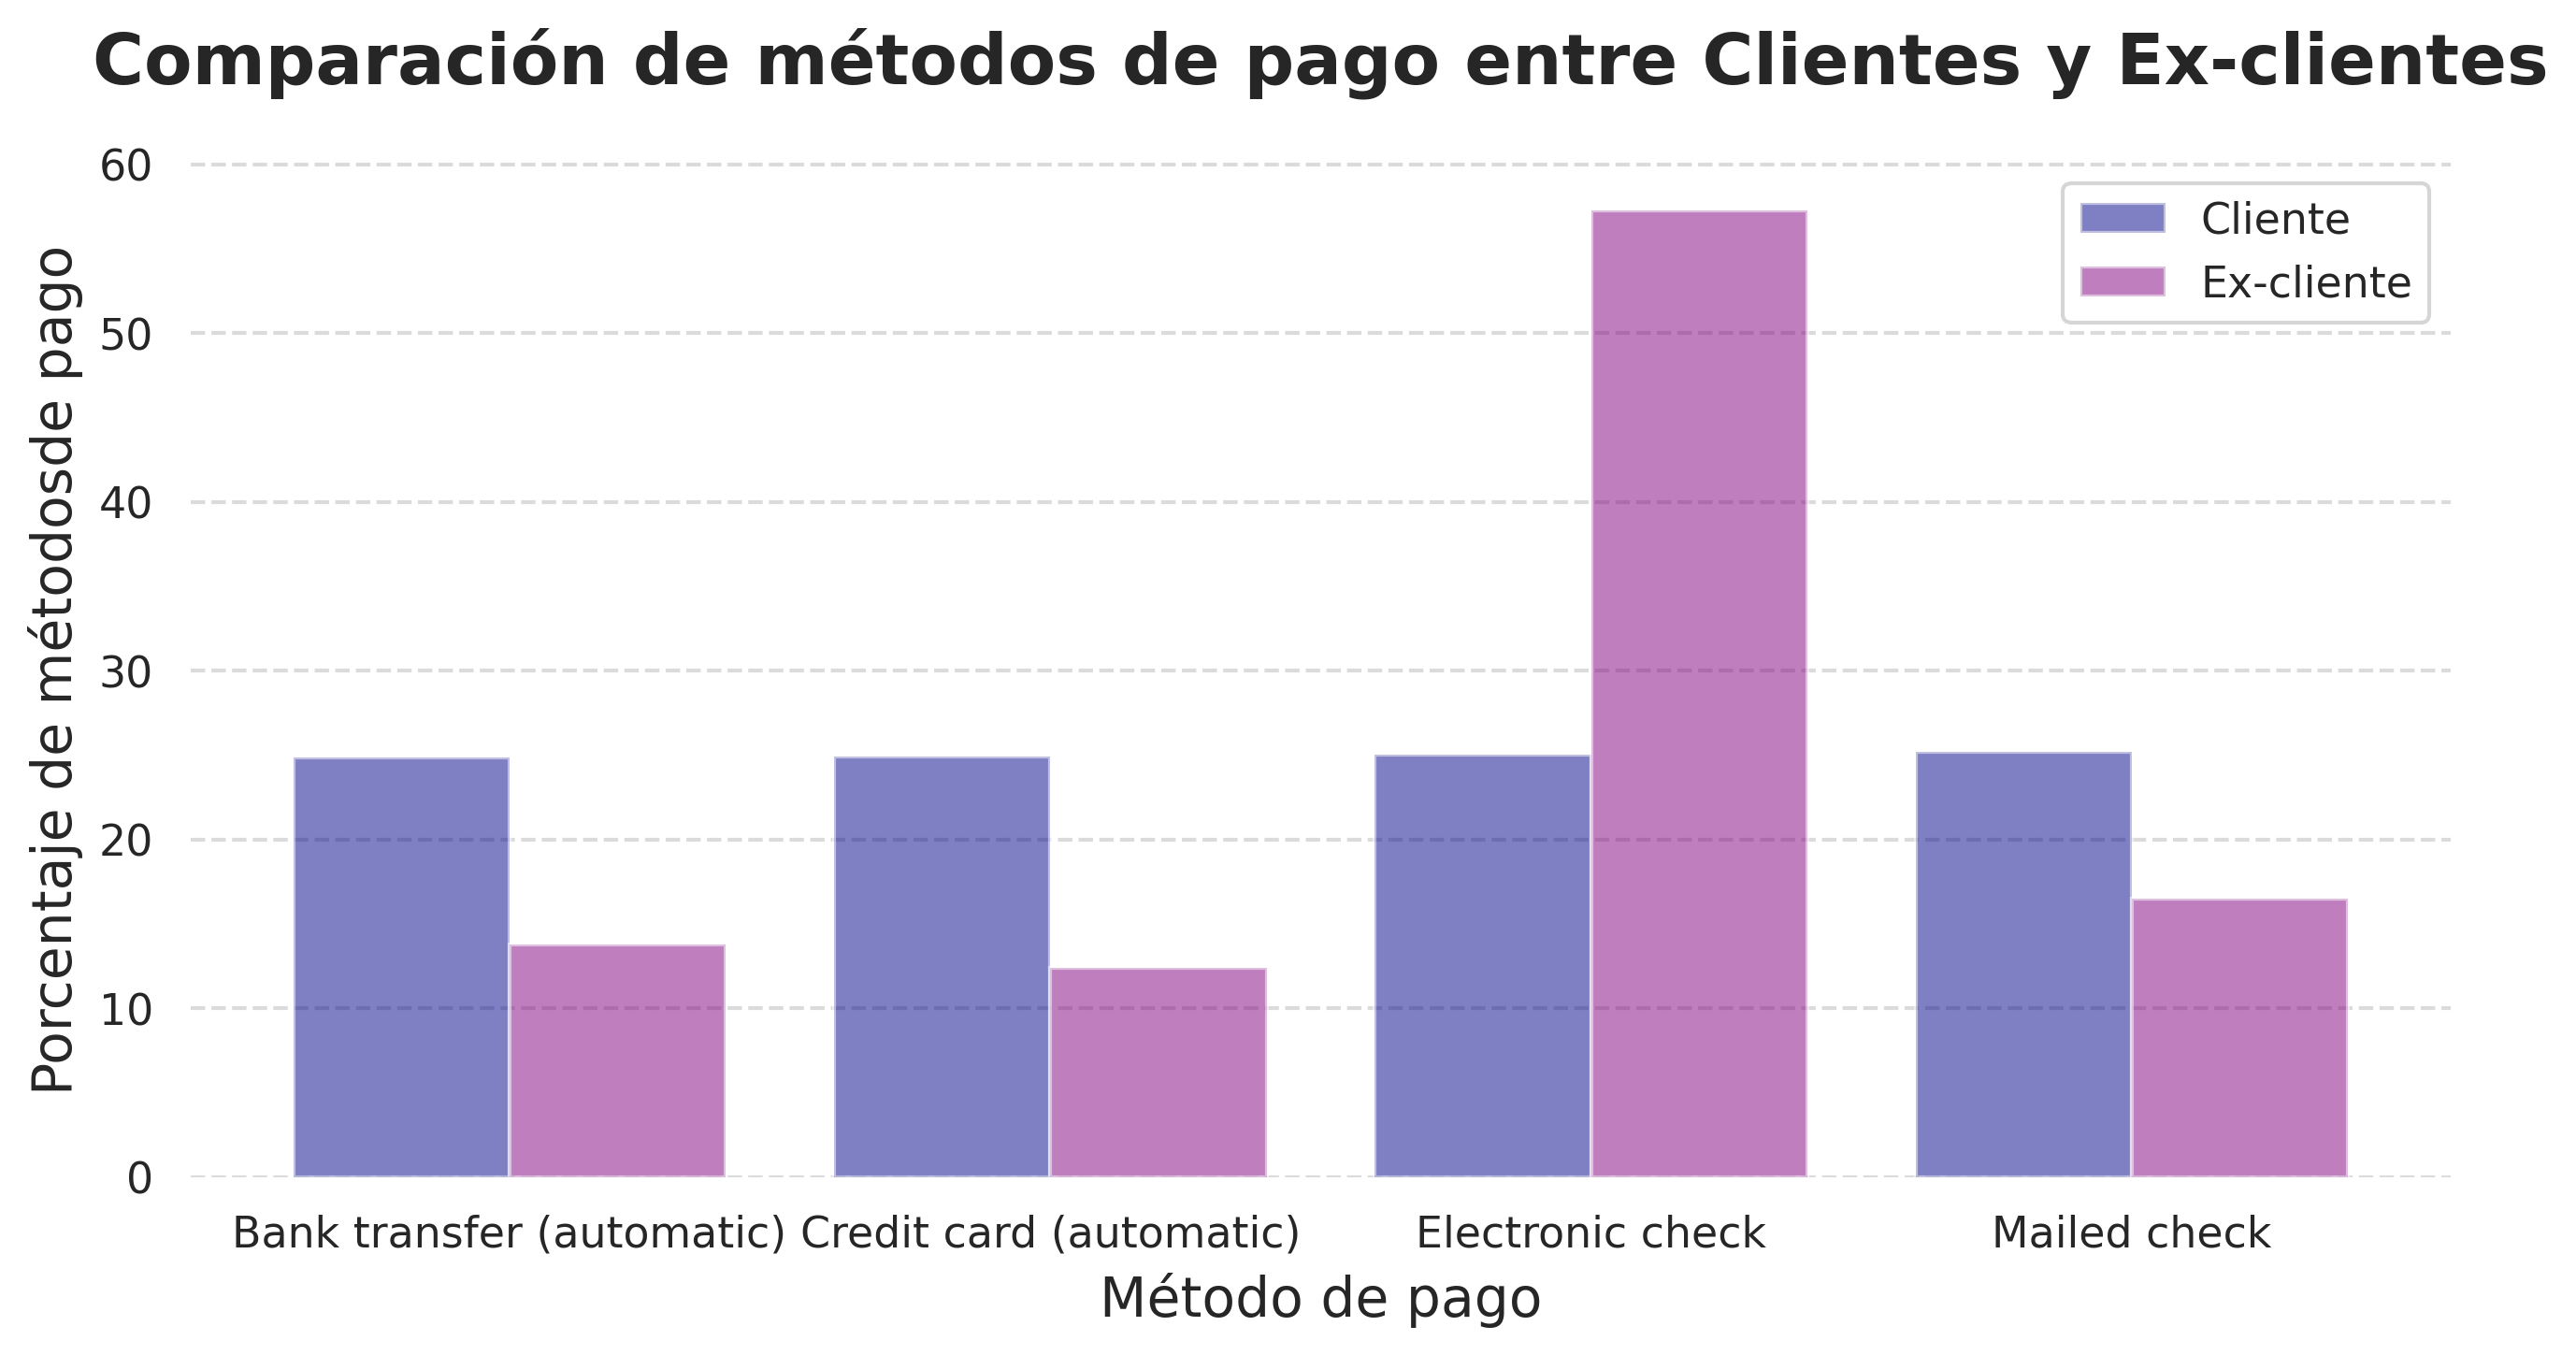

In [ ]:
display(Image('/content/Metodos_de_pago.png', width=750, height=350))

###**Servicios Contratados**

Los clientes actuales tienden a contratar más servicios complementarios (TV, películas, respaldo en la nube, soporte técnico).

Los ex-clientes tienen una presencia significativa en servicios básicos y menos compromiso con el ecosistema digital de la empresa.

Además, se observa una mayor proporción de ex-clientes que tenían contratado el servicio de fibra óptica en comparación con aquellos que utilizaban DSL. Esto sugiere que los usuarios de fibra óptica podrían presentar una mayor propensión al abandono en este conjunto de datos.


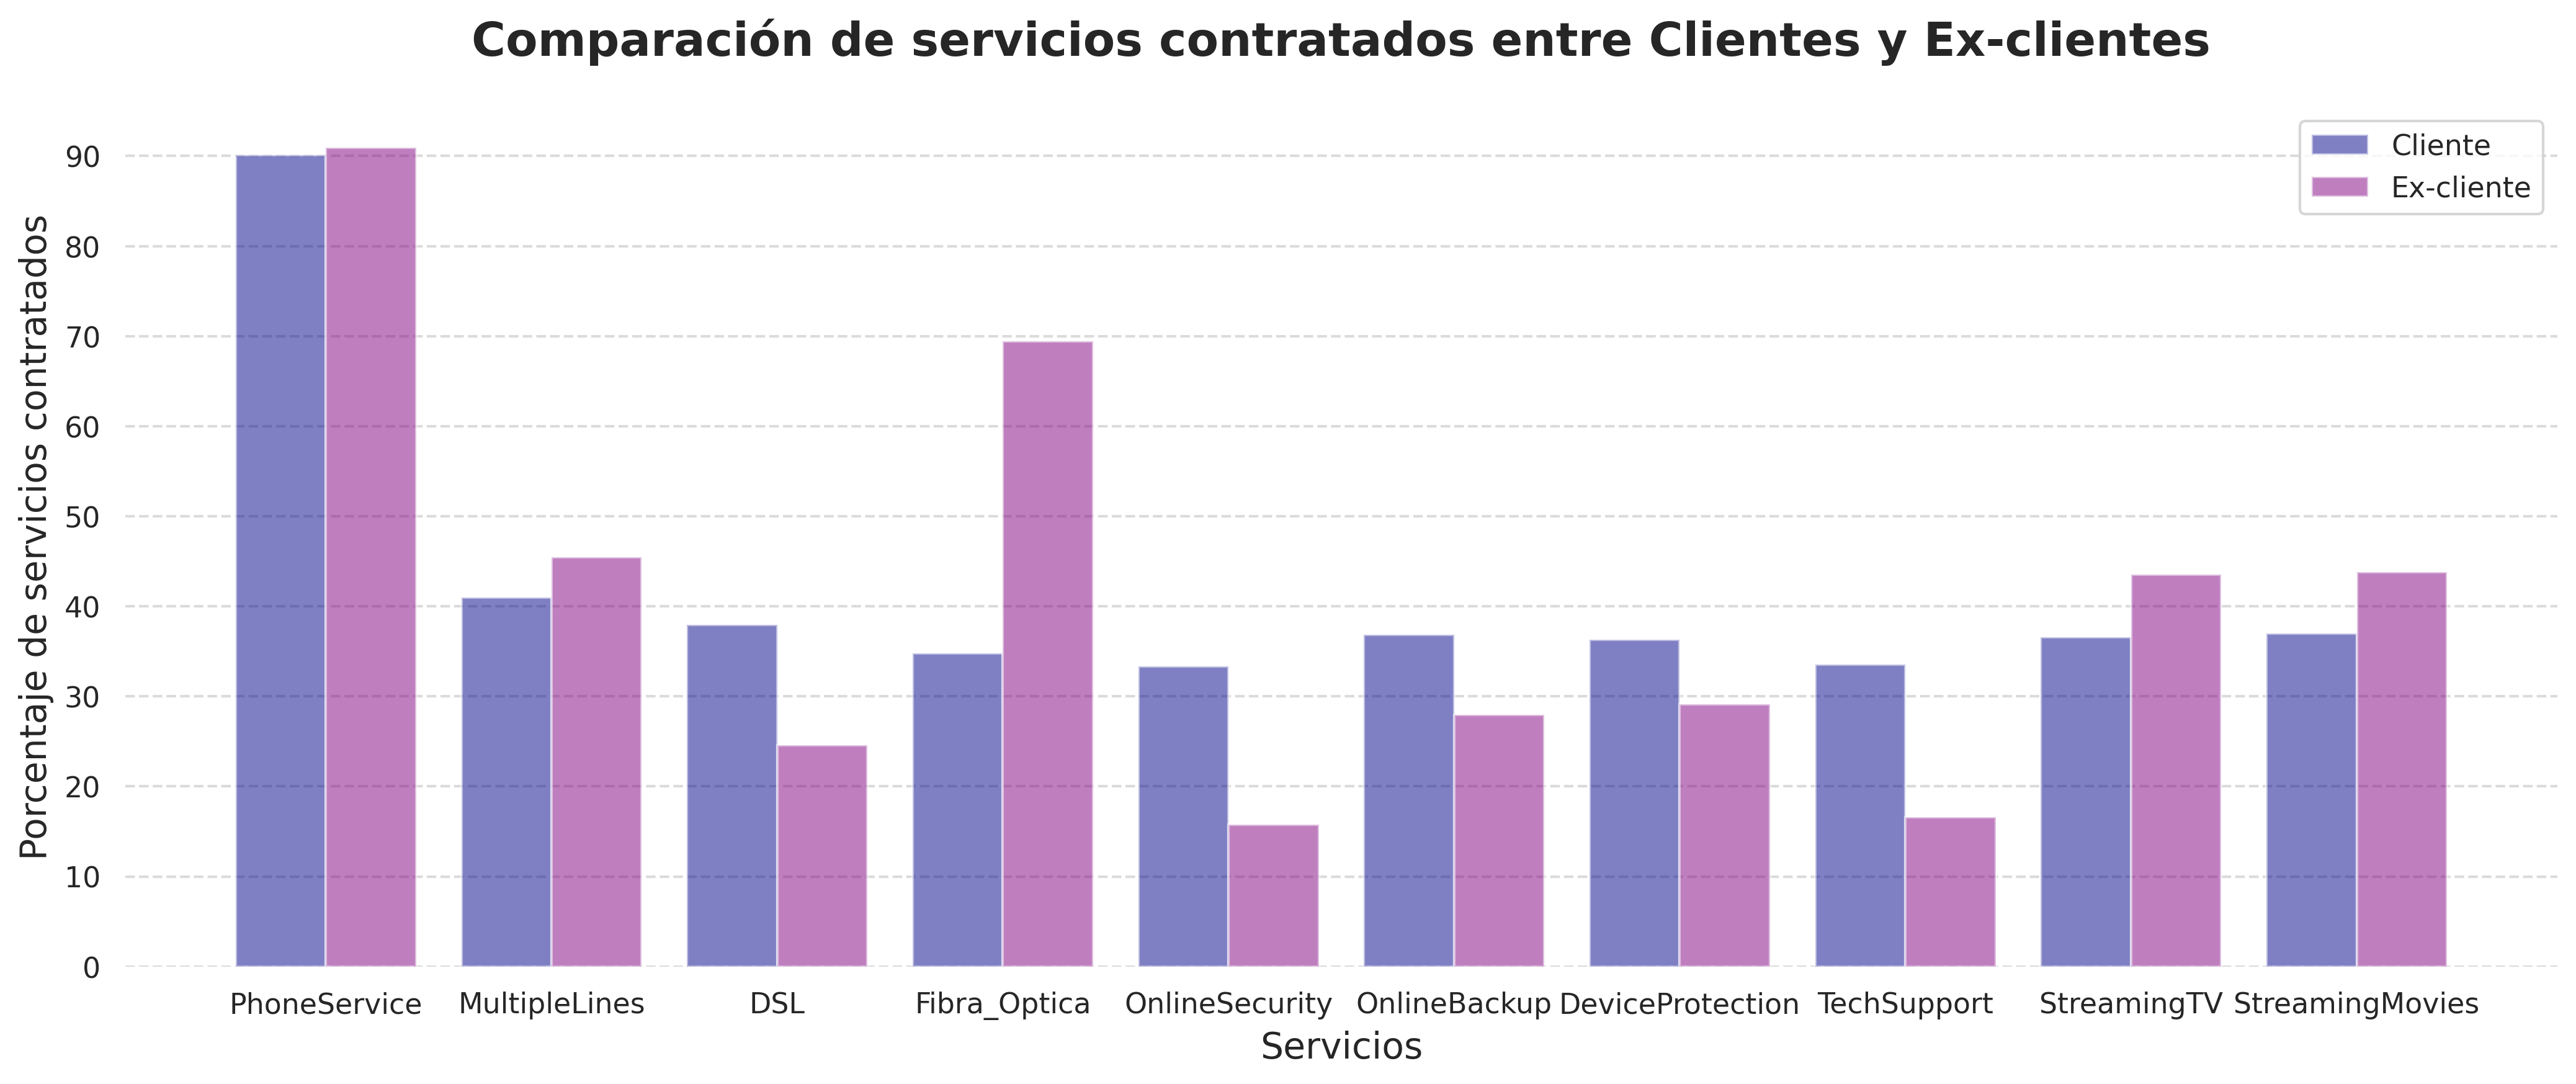

In [ ]:
display(Image('/content/Servicios_contratados.png', width=800, height=400))

Un análisis más detallado revela una relación no lineal entre la cantidad de servicios contratados y la probabilidad de abandono. Como se observa en el gráfico siguiente, los clientes que contratan 3 o 4 servicios presentan la mayor probabilidad de churn, superando el 40%. En cambio, quienes tienen 1 o 2 servicios o bien más de 6 servicios, muestran tasas de abandono considerablemente menores.

Esto sugiere que existe un grupo de usuarios que, a pesar de contratar varios servicios, no desarrollan suficiente compromiso con la empresa o enfrentan una complejidad en la oferta que no se traduce en valor percibido. Asimismo, los clientes con muchos servicios podrían estar más integrados y, por tanto, menos propensos al churn.

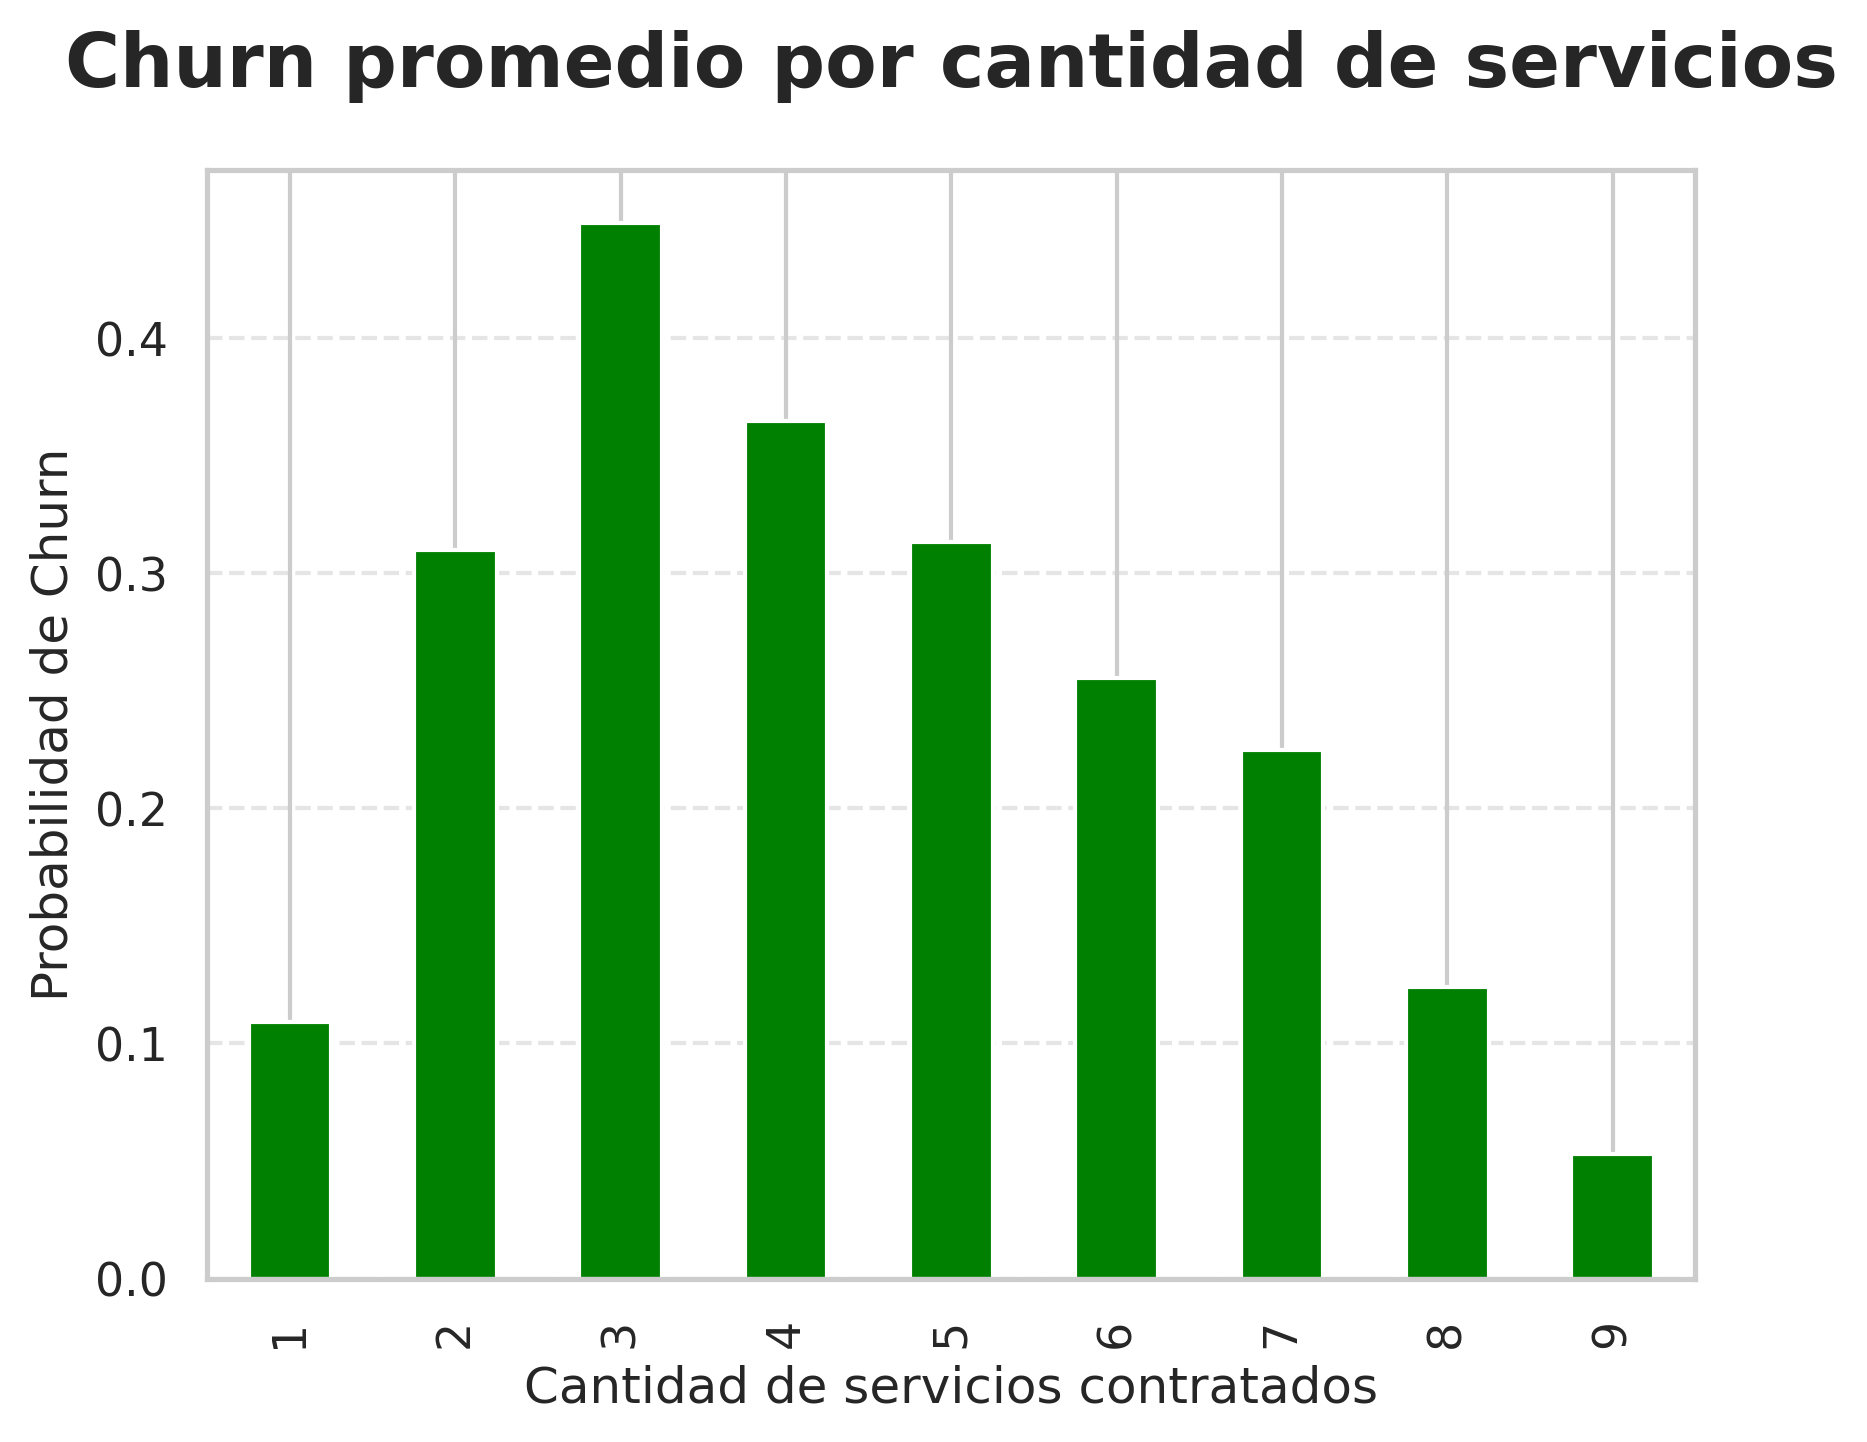

In [ ]:
display(Image('/content/Churn_promedio_por_servicios.png', width=550, height=450))

###**Cuentas Diarias**

La distribución del monto de pagos diarios también entrega insights relevantes sobre el comportamiento de clientes y ex-clientes:

Los clientes actuales tienden a concentrarse en el rango de pago diario bajo ($0.60 - $1.00) pero también están más presentes en tramos altos de pagos diarios.

Los ex-clientes muestran una distribución más uniforme en rangos medios, con menor presencia en extremos.

Esto podría indicar que los usuarios con patrones de pago más consistentes (bajos o altos) tienden a permanecer más tiempo con la empresa.

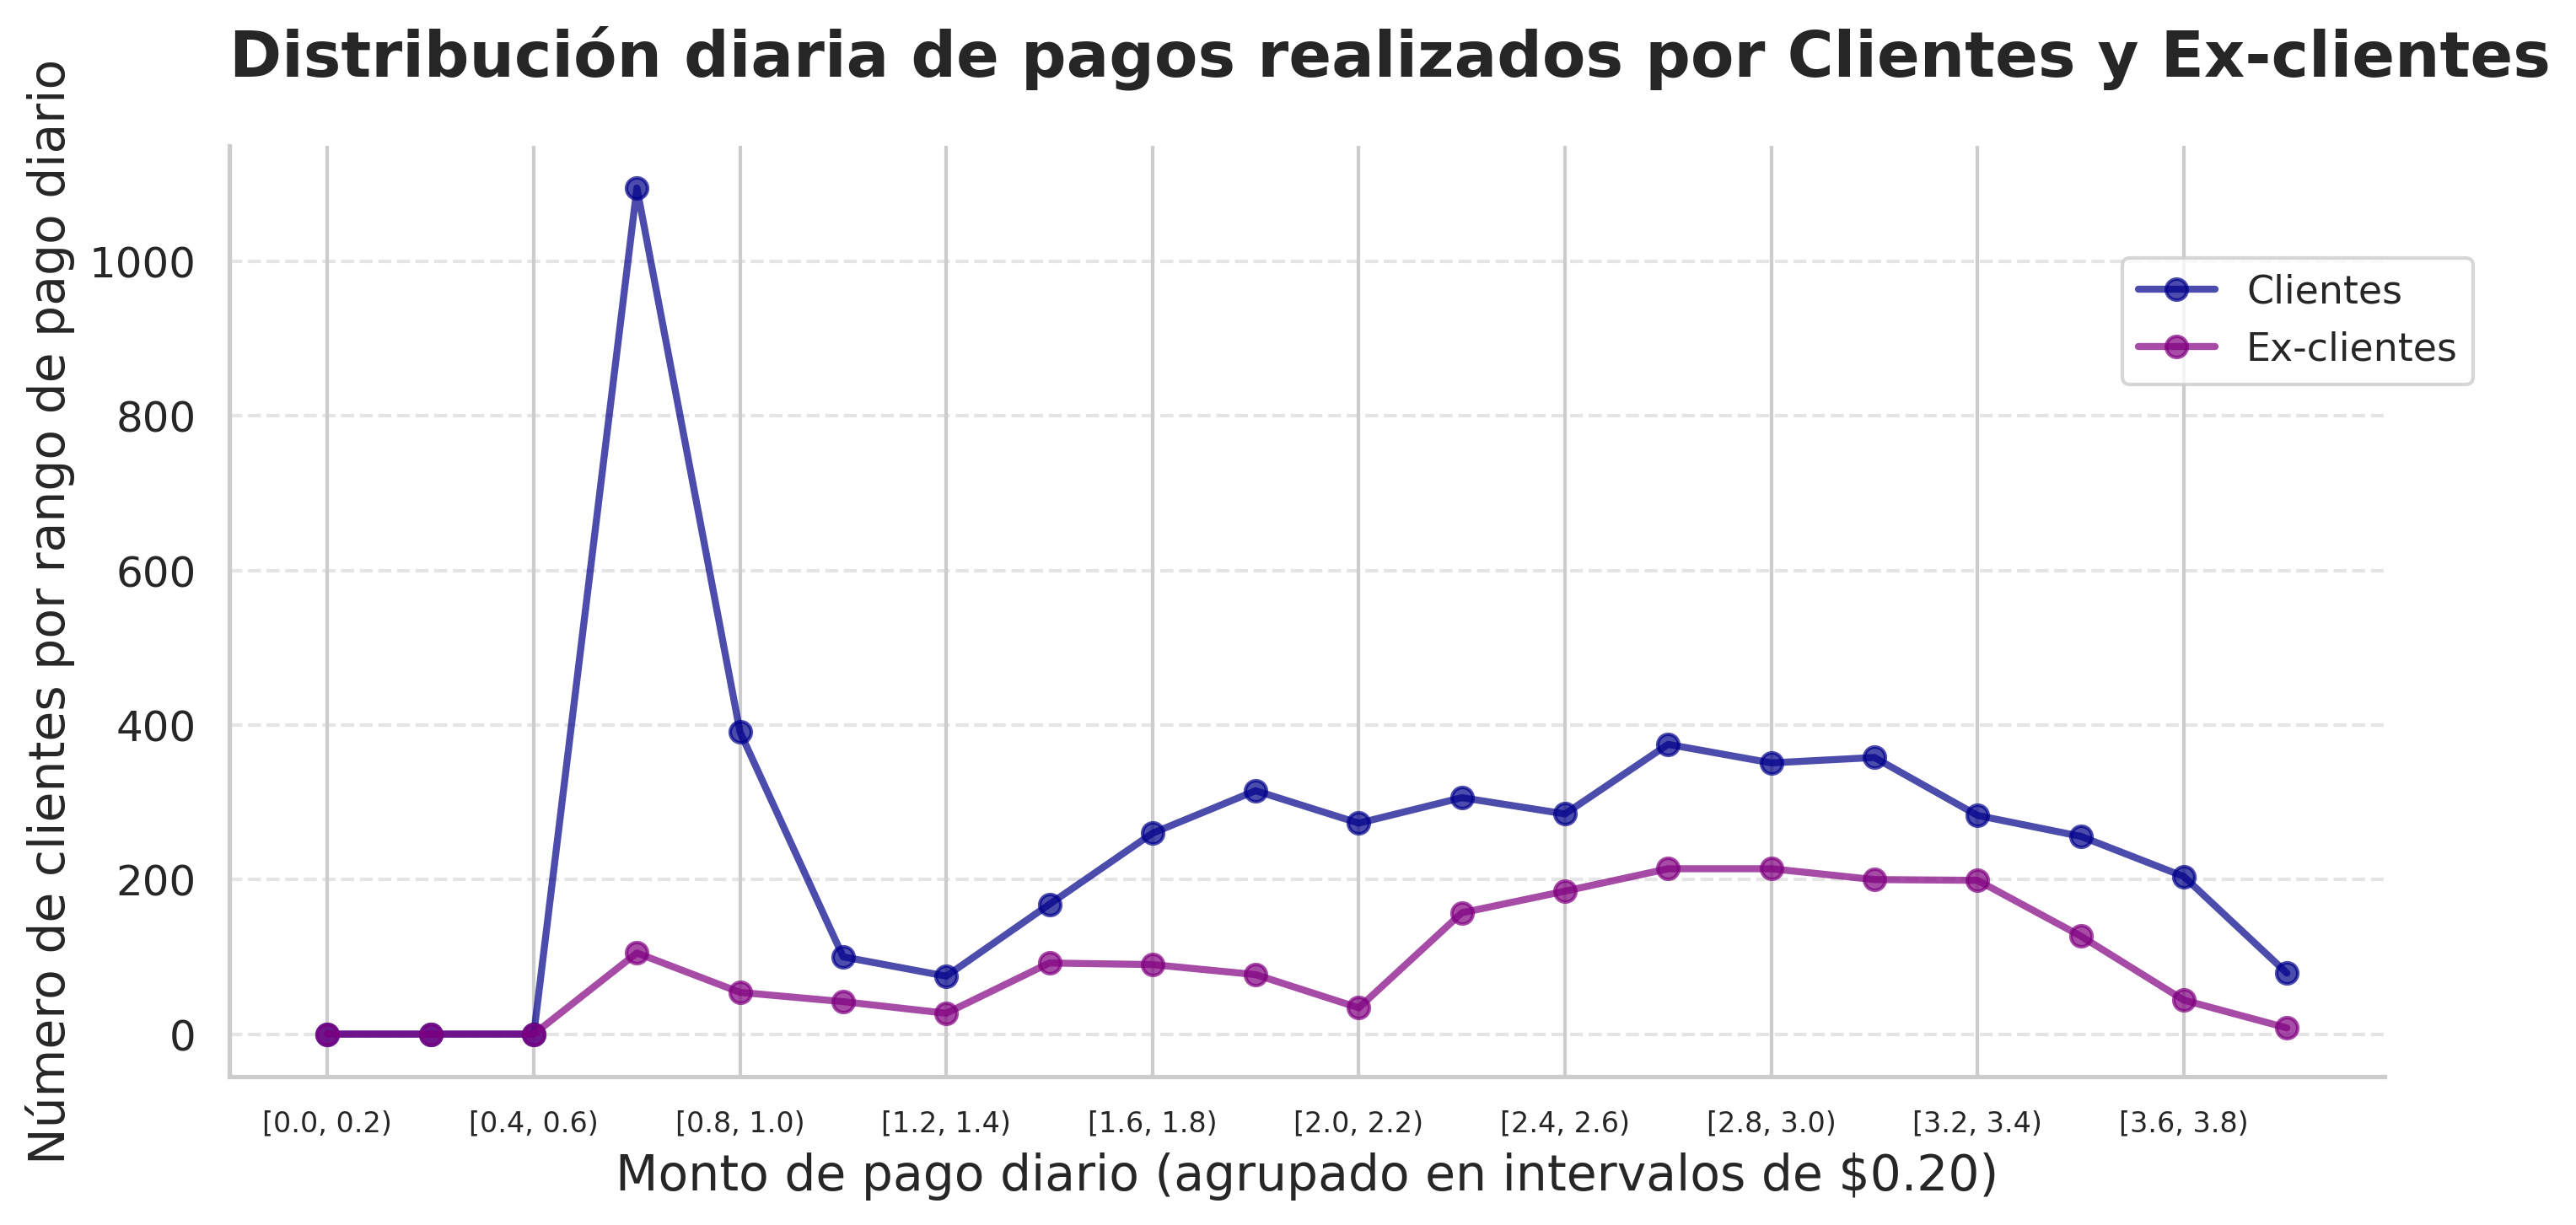

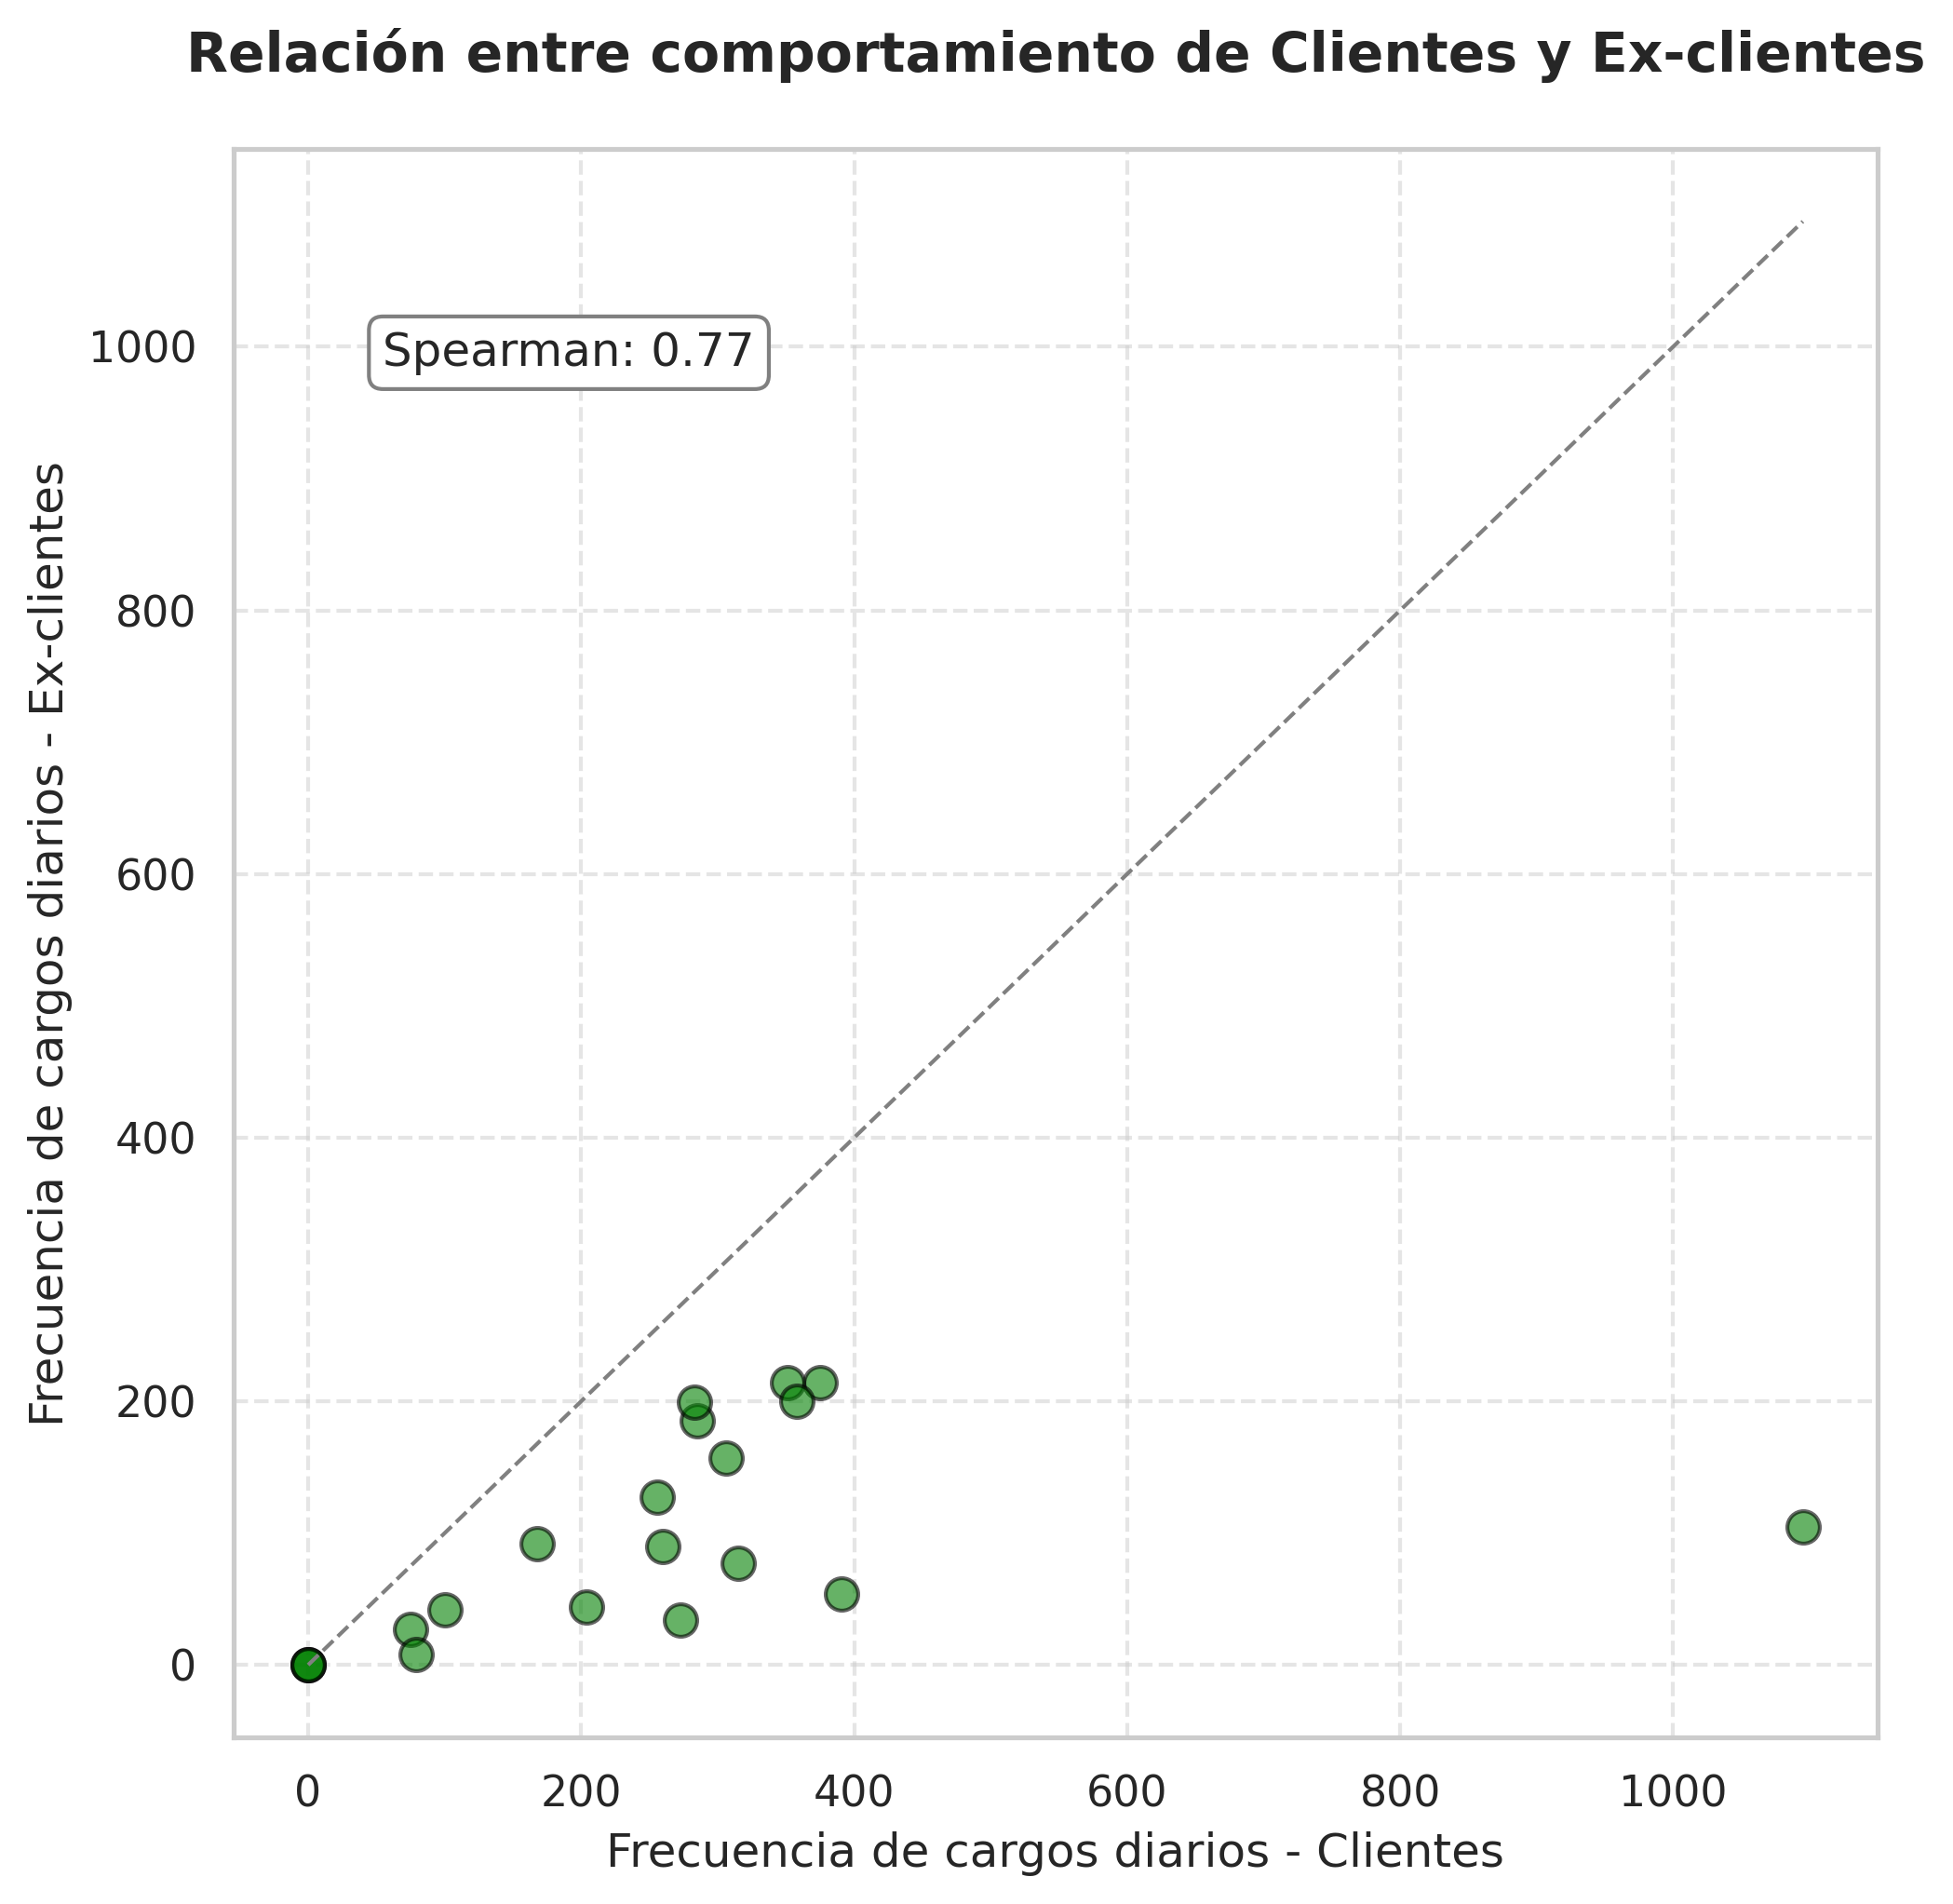

In [ ]:
display(Image('/content/Cuentas_diarias.png', width=800, height=450))
print('')
display(Image('/content/Correlacion_cuentas_diarias.png', width=550, height=400))

---
---
## **Conclusiones**

El abandono de clientes no es aleatorio, sino que está fuertemente asociado a ciertas variables clave como el tipo de contrato, el método de pago, el nivel de cargos mensuales y el número de servicios contratados.

Los clientes con contratos mensuales presentan una tasa de abandono significativamente mayor en comparación con aquellos que poseen contratos a plazo fijo o de largo plazo. Esto sugiere que los contratos más flexibles podrían favorecer la rotación.

El método de pago electrónico automático se asocia con una menor tasa de abandono, lo que indica que simplificar el proceso de pago podría tener un efecto positivo en la retención.

Clientes que pagan cargos mensuales más altos, pero no acceden a múltiples servicios, tienen mayor probabilidad de churn. Esto sugiere una percepción de baja relación valor/precio, especialmente si el servicio no está adecuadamente personalizado.

El análisis de la variable Cuentas_diarias mostró diferencias claras en los patrones de actividad entre clientes actuales y ex-clientes. La menor interacción diaria puede ser un indicador temprano de desinterés o insatisfacción.

Las visualizaciones comparativas permitieron identificar segmentos de riesgo, lo que habilita a la empresa a diseñar estrategias de retención más específicas y basadas en datos.


---
###**Recomendaciones**

- Diseñar programas de onboarding para nuevos clientes.

- Incentivar upgrades de contrato y servicios adicionales.

- Mejorar los métodos de pago ofrecidos.

- Implementar estrategias personalizadas para clientes que contratan 3 o 4 servicios, quienes presentan mayor riesgo de abandono.

- Monitorear a los usuarios con pagos diarios inconsistentes, ya que podrían reflejar menor compromiso o satisfacción.

- Fomentar la adopción de múltiples servicios digitales para fortalecer la integración del cliente con la empresa.